#**DATA VISULIZATION**





---


# **Data Visualization and Analysis**

The approach uses graphics and statistical analysis to extract insights from the data, detect patterns, and establish connections between different variables.

The target feature is **Performance Rating**.



---


# **1-1. Import Libraries**

In [1]:
# drive module for mounting gdrive storage
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis'

Mounted at /content/gdrive
/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis


In [2]:
# basic libraries for statistics and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pylab
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



---


# **2-2. Load Preprocessed Data**
* File containing preprocessed employee performance data

In [3]:
# load preprocessed data from CSV files
df = pd.read_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/pre_processed_data.csv')
display(df.head())
print('='*150)
display(df.tail())

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,...,2,6,3,3,6,5,0,4,No,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,...,1,4,2,3,1,0,0,0,No,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,...,3,20,3,3,20,8,3,8,No,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,...,2,9,3,4,8,7,7,7,No,3
1199,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,...,1,4,3,3,2,2,2,0,Yes,2




---


# **3-3. Statistical Analysis**




---


## **3-3.1 Categorical Features**


In [4]:
# Check distribution of categorical features
df.describe(include=['O']).T

,count,unique,top,freq
Gender,1200,2,Male,725
EducationBackground,1200,6,Life Sciences,492
MaritalStatus,1200,3,Married,548
EmpDepartment,1200,6,Sales,373
EmpJobRole,1200,19,Sales Executive,270
BusinessTravelFrequency,1200,3,Travel_Rarely,846
OverTime,1200,2,No,847
Attrition,1200,2,No,1022




---


## **3-3.2 Numerical Features**


In [5]:
# Check distribution of numerical features (max , min, std of values)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0




---


# **4-4. Departmental Analysis**


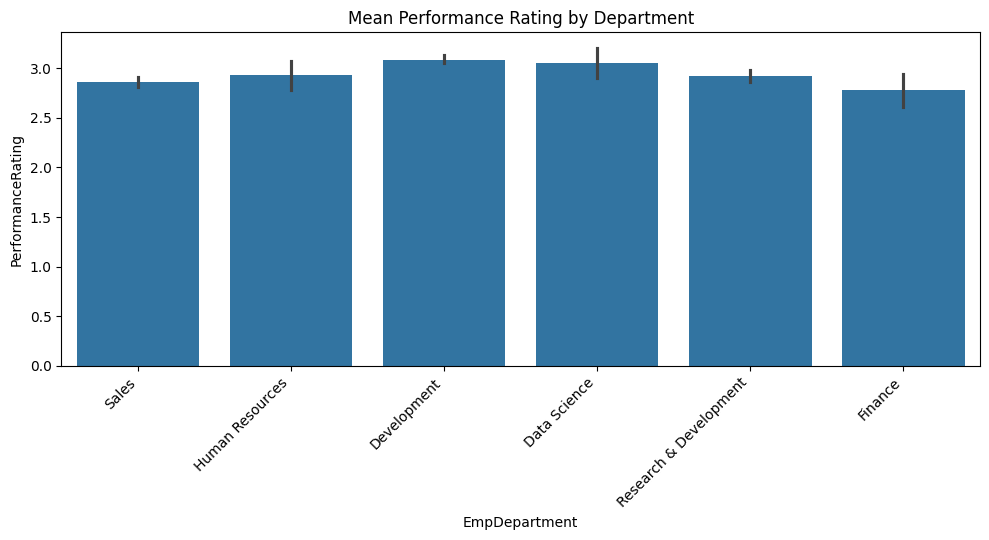

,PerformanceRating
EmpDepartment,
Data Science,3.050000
Development,3.085873
Finance,2.775510
Human Resources,2.925926
Research & Development,2.921283
Sales,2.860590


In [6]:
# mean performance by EmpDepartment

# Group data by department and calculate the mean performance rating
department_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean()

# Create a bar plot to visualize the mean performance by department
plt.figure(figsize=(10,5.5))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=df)
plt.title('Mean Performance Rating by Department')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Print the mean performance for each department
department_performance

In [7]:
# value counts for each EmpDepartment performance rating

department_performance_counts = df.groupby(['EmpDepartment', 'PerformanceRating'])['PerformanceRating'].count().unstack()

# Display the value counts
department_performance_counts

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1,17,2
Development,13,304,44
Finance,15,30,4
Human Resources,10,38,6
Research & Development,68,234,41
Sales,87,251,35


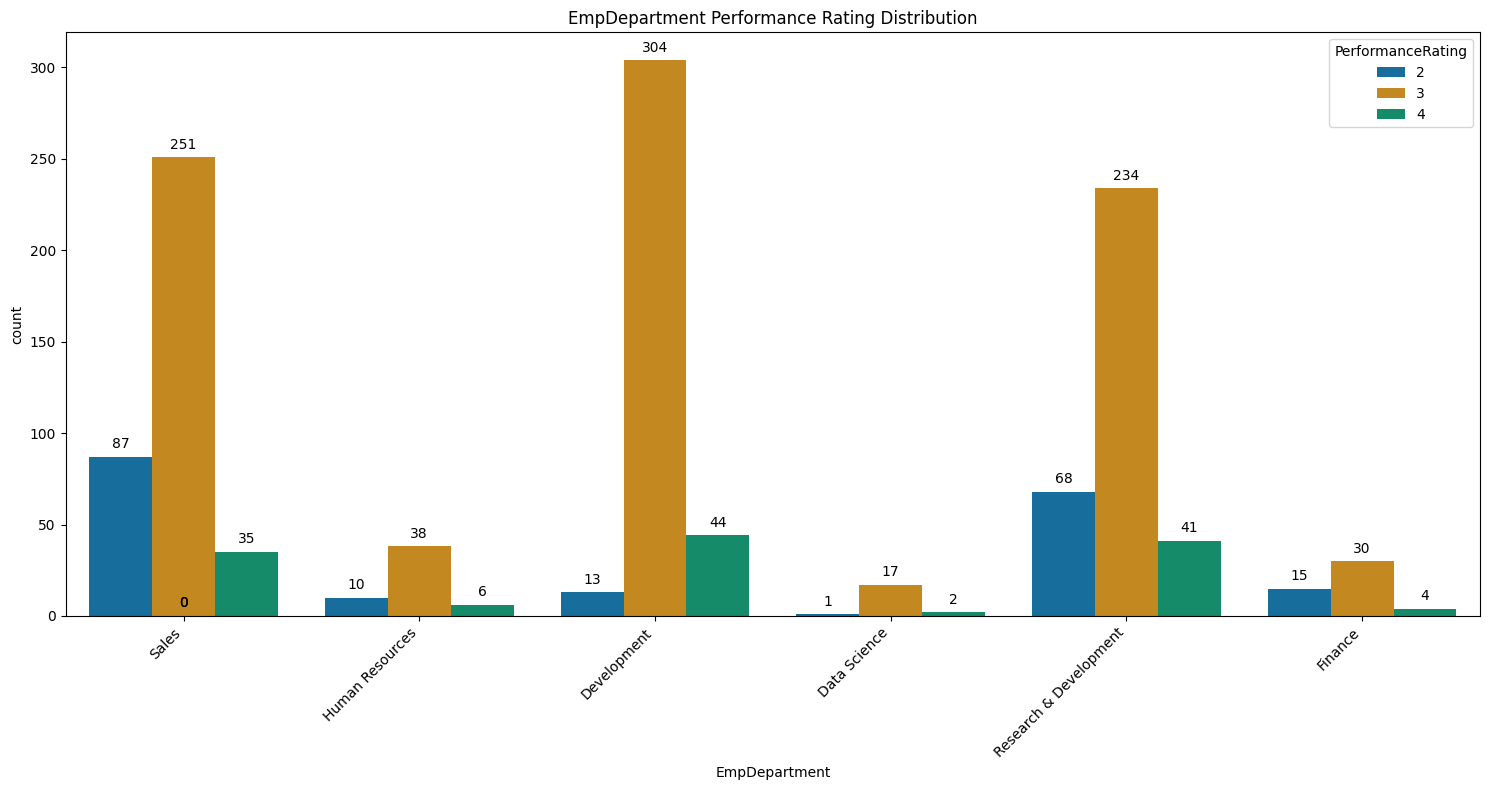

In [8]:
# Plot of EmpDepartment's performance rating distribution for all departments

plt.figure(figsize=(15, 8))
ax = sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=df, palette="colorblind")
plt.title('EmpDepartment Performance Rating Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

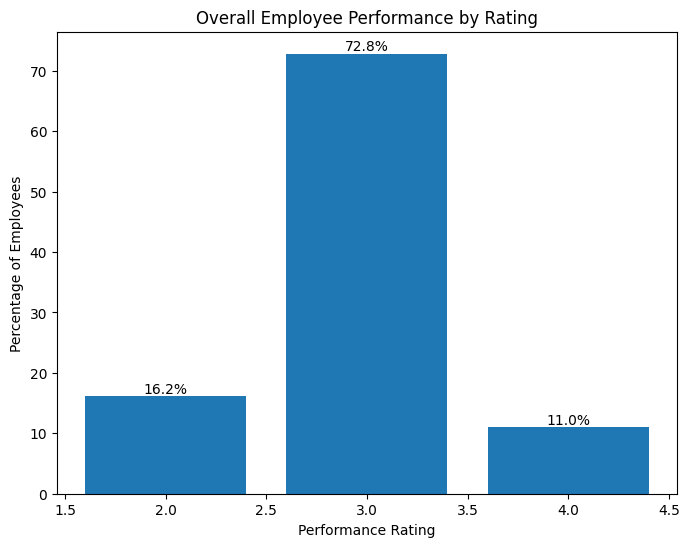

In [9]:
# visualize overall employee performance by rating.
performance_counts = df['PerformanceRating'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(performance_counts.index, performance_counts.values)
plt.xlabel("Performance Rating")
plt.ylabel("Percentage of Employees")
plt.title("Overall Employee Performance by Rating")

# Add percentage labels to the bars
for bar, percentage in zip(bars, performance_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()



---


# **5-5. Univariate Analysis of Selected Factors**


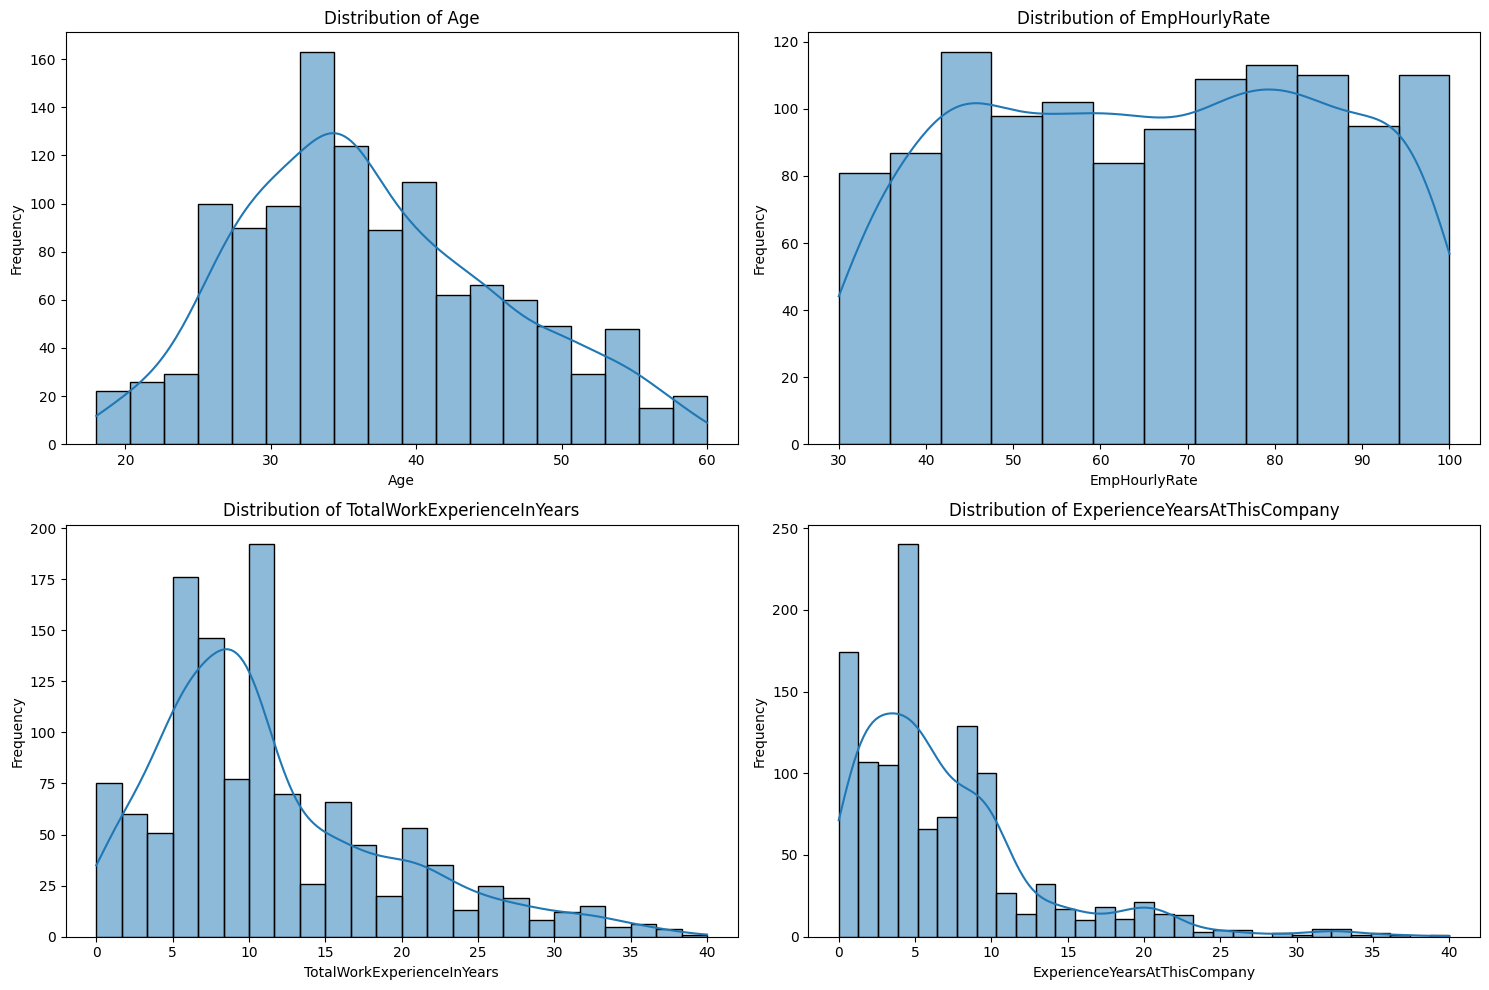

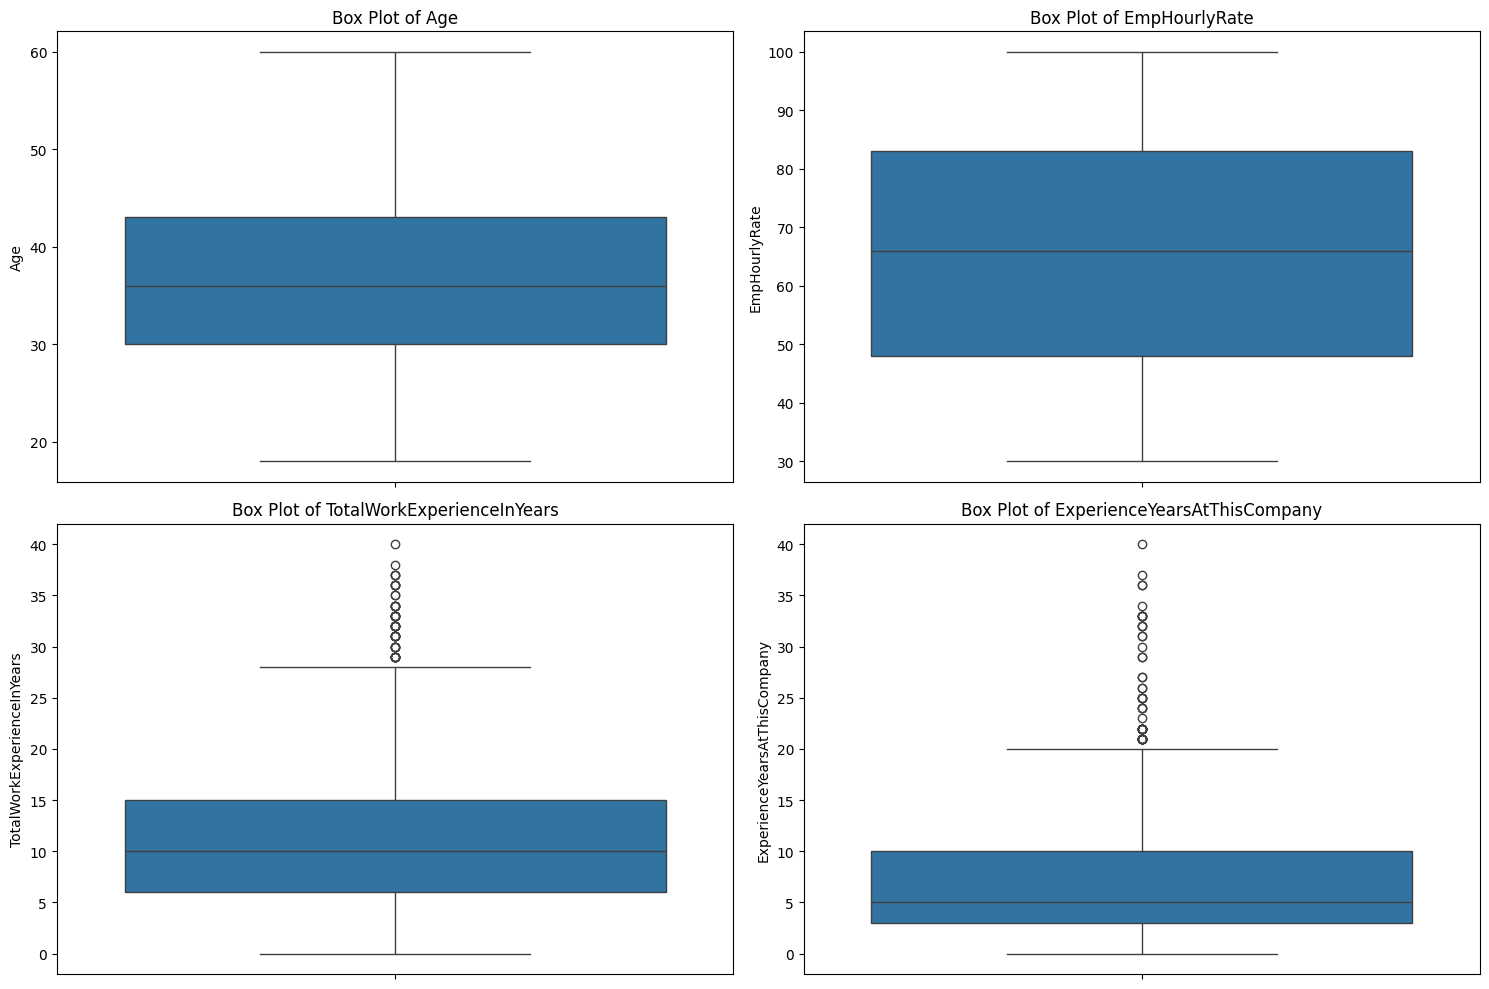

               Age  EmpHourlyRate  TotalWorkExperienceInYears  \
count  1200.000000    1200.000000                 1200.000000   
mean     36.918333      65.981667                   11.330000   
std       9.087289      20.211302                    7.797228   
min      18.000000      30.000000                    0.000000   
25%      30.000000      48.000000                    6.000000   
50%      36.000000      66.000000                   10.000000   
75%      43.000000      83.000000                   15.000000   
max      60.000000     100.000000                   40.000000   

       ExperienceYearsAtThisCompany  
count                   1200.000000  
mean                       7.077500  
std                        6.236899  
min                        0.000000  
25%                        3.000000  
50%                        5.000000  
75%                       10.000000  
max                       40.000000  


In [29]:
# Selected features for univariate analysis
features = ['Age', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']

# Create subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots for the selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Calculate descriptive statistics for the selected features
print(df[features].describe())

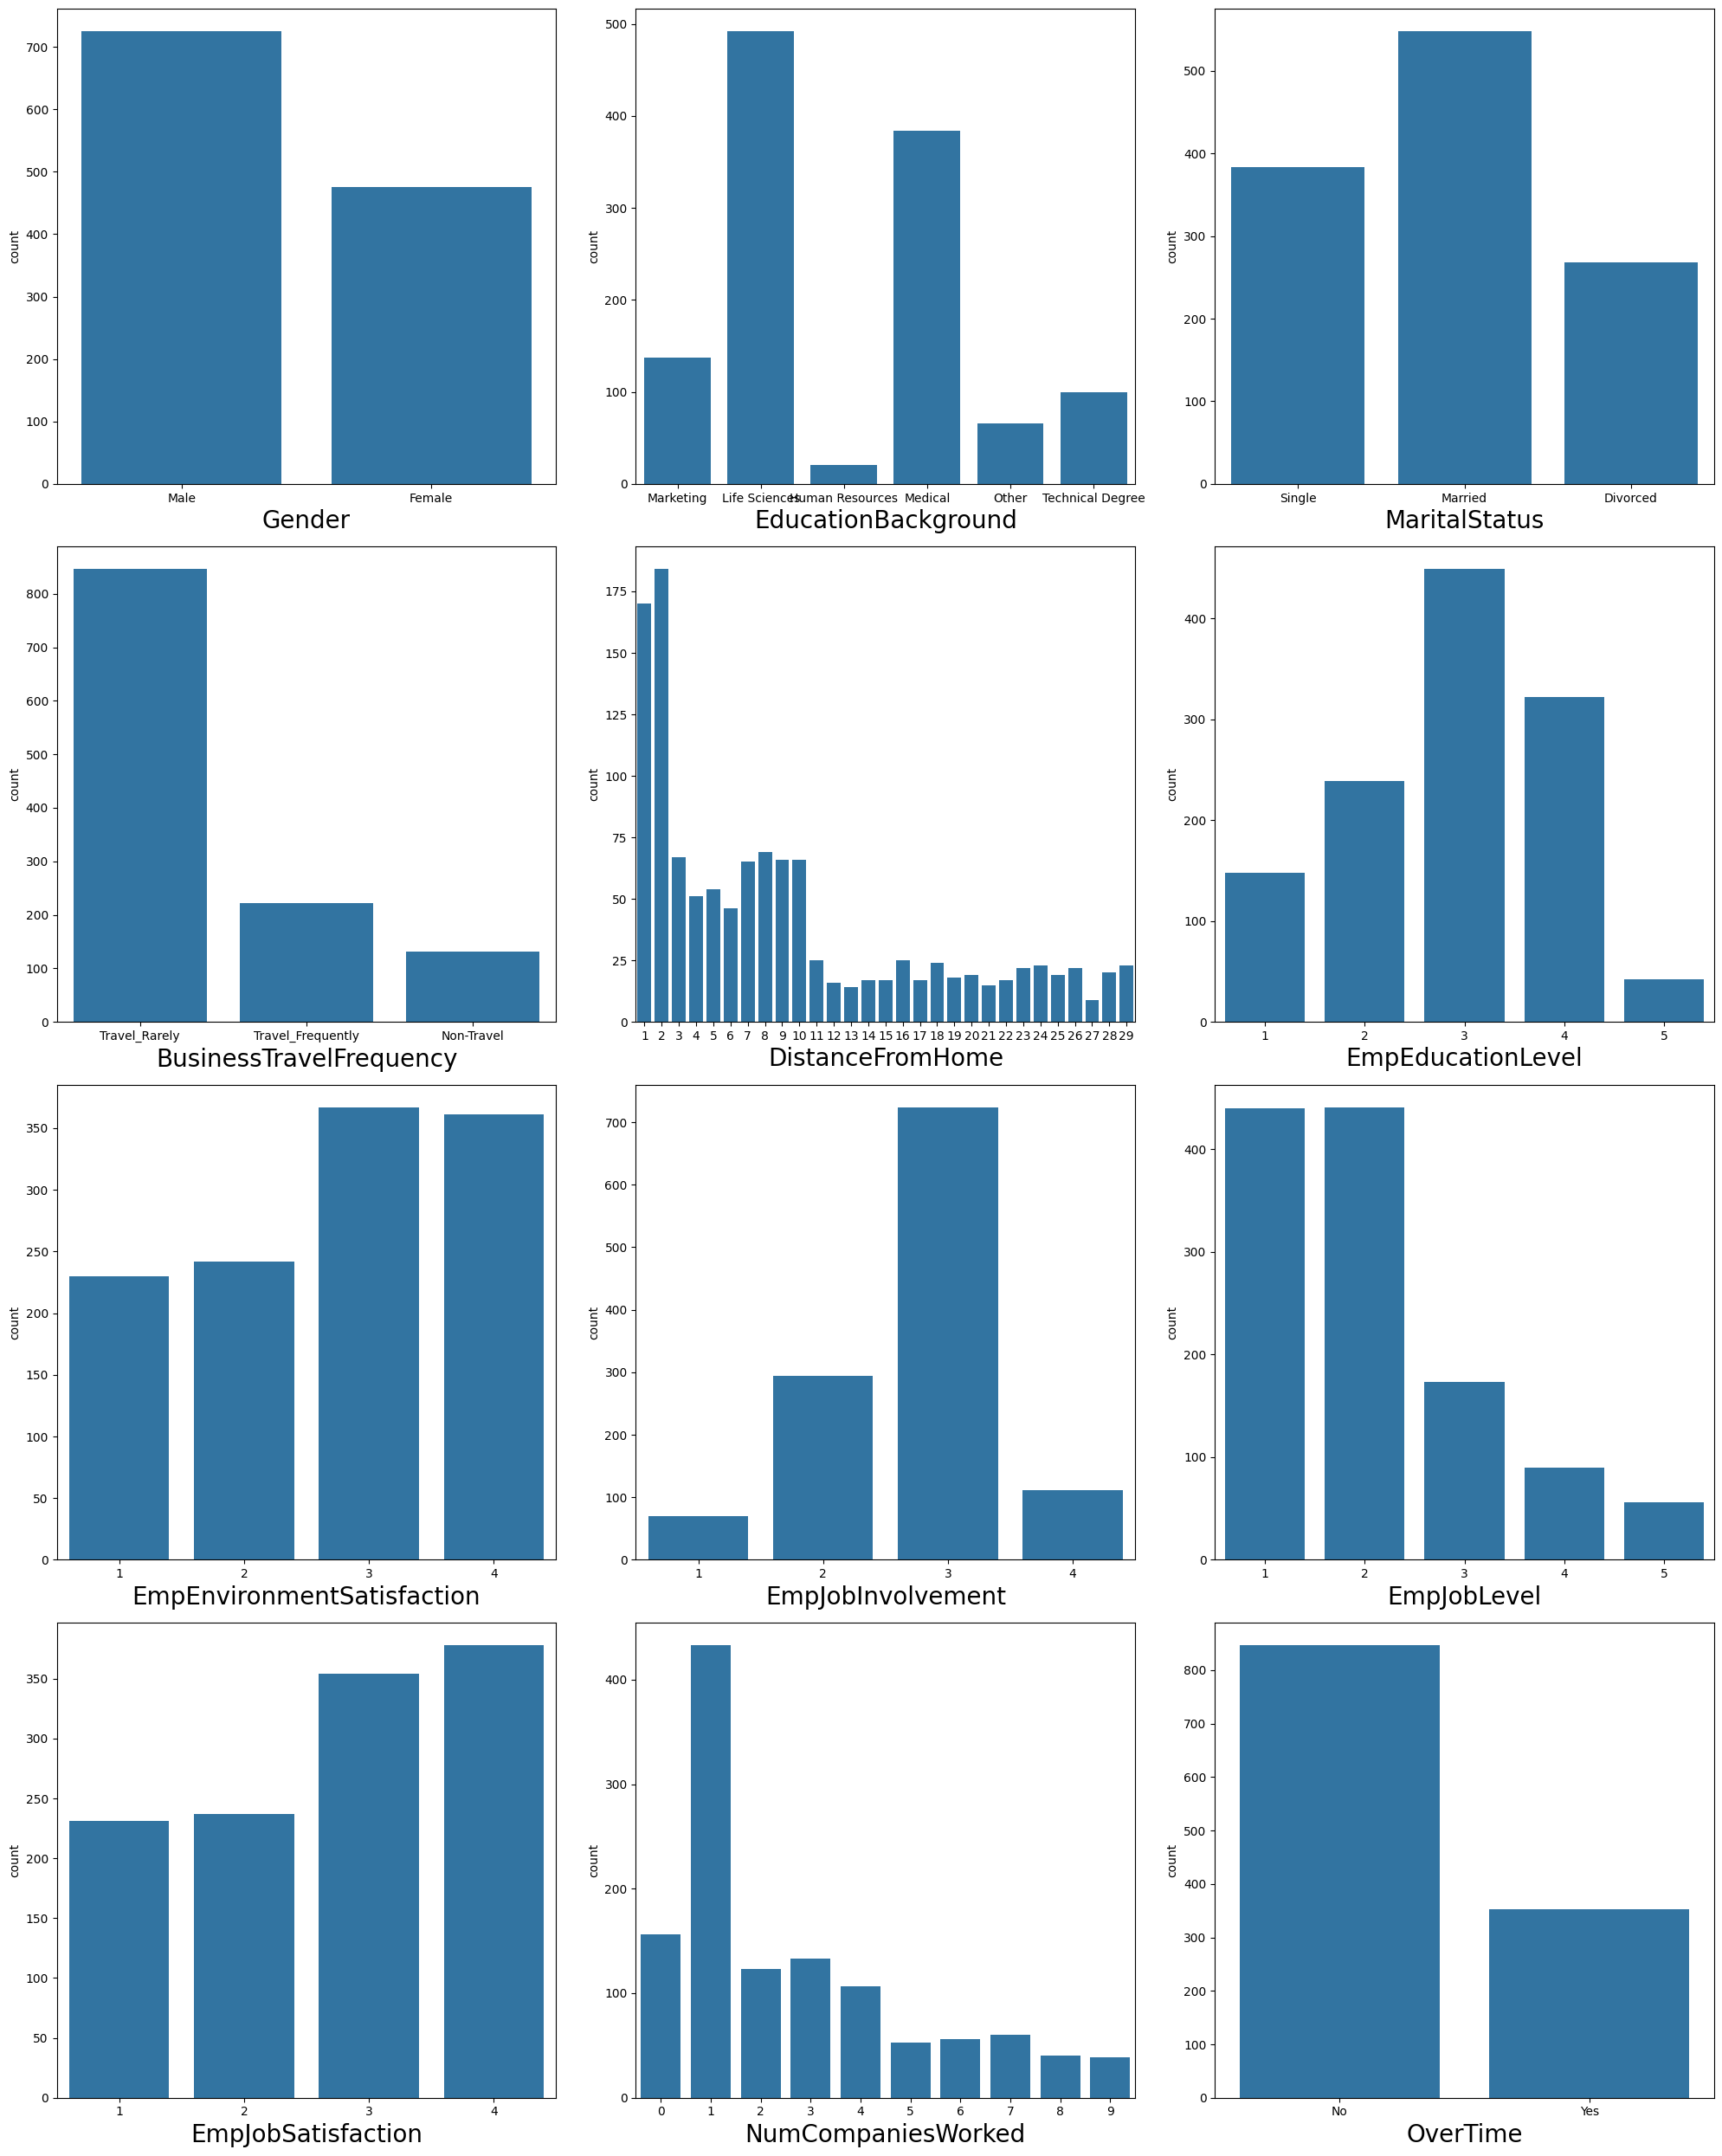

In [31]:
features = df[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] # making lsit of next 12 feature

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in features: # iteration of columns / acessing the columns from count
    if plotno<=13:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=features[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

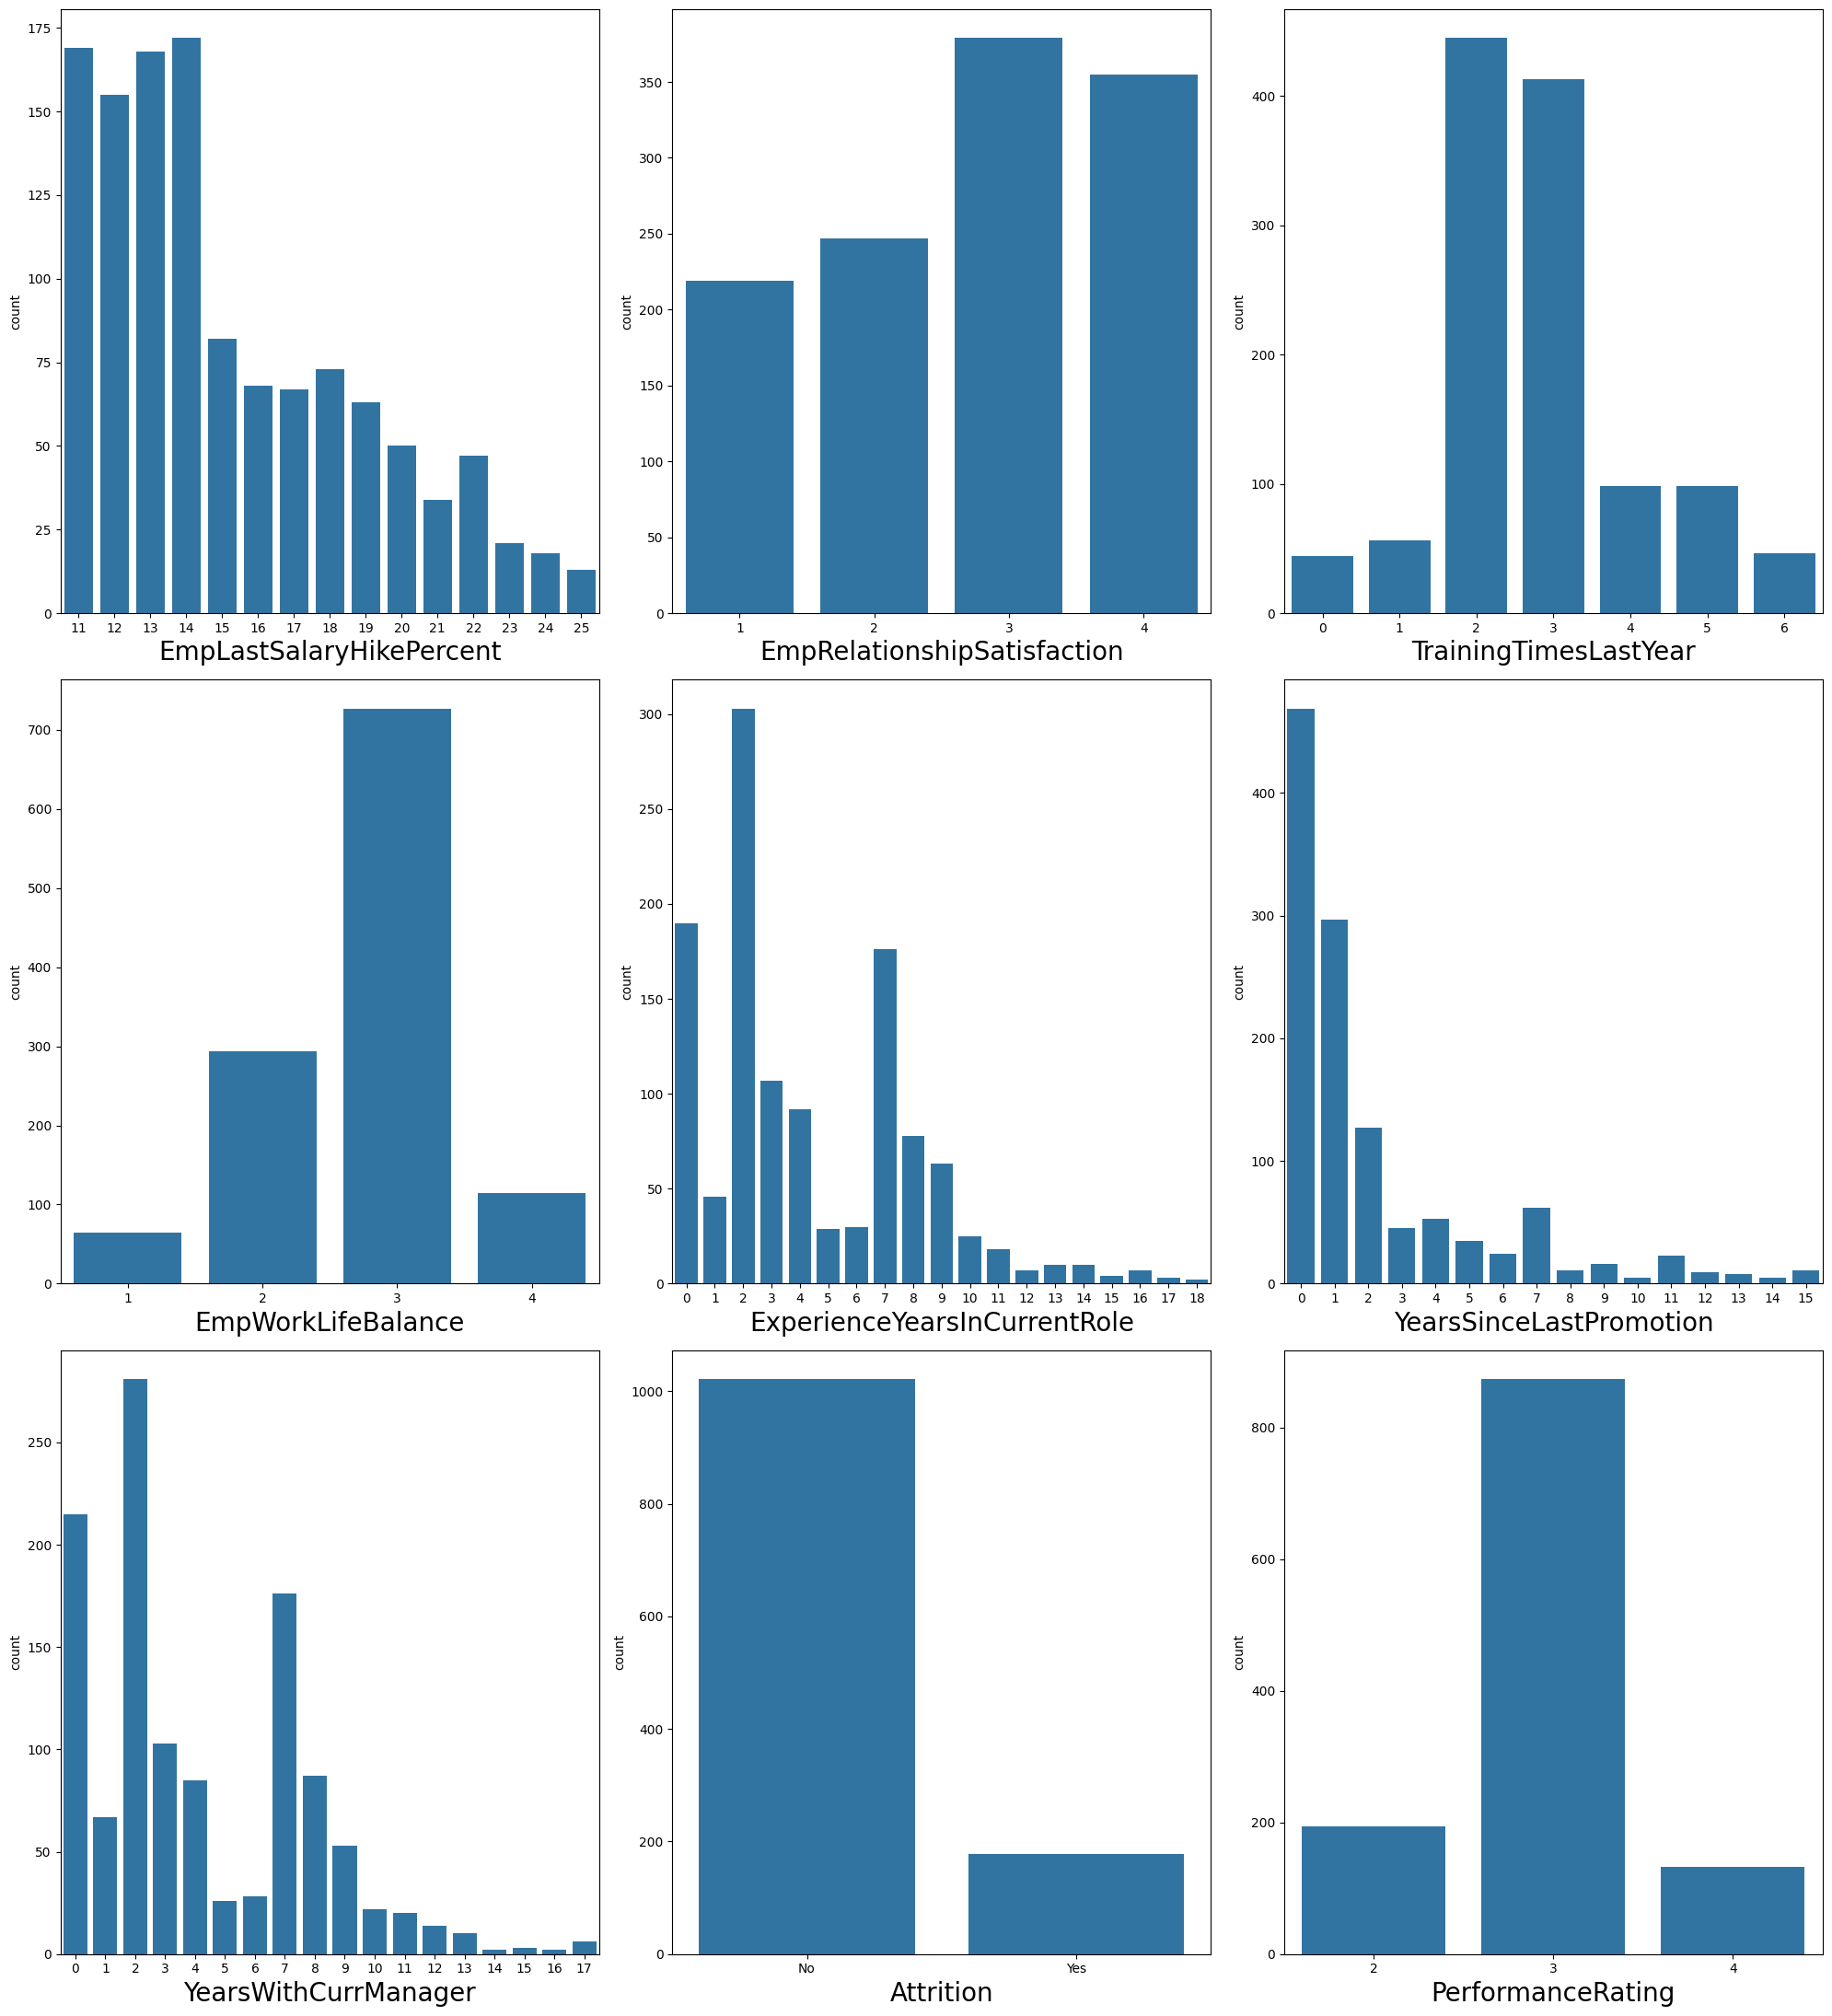

In [32]:
features_2 = df[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition',
               'PerformanceRating']]  #Making nex feature list to plot the graph

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in features_2: # iteration of columns / acessing the columns from count
    if plotno<=10:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=features_2[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction



---


# **6-6. Multivariate Analysis of Selected Factors**


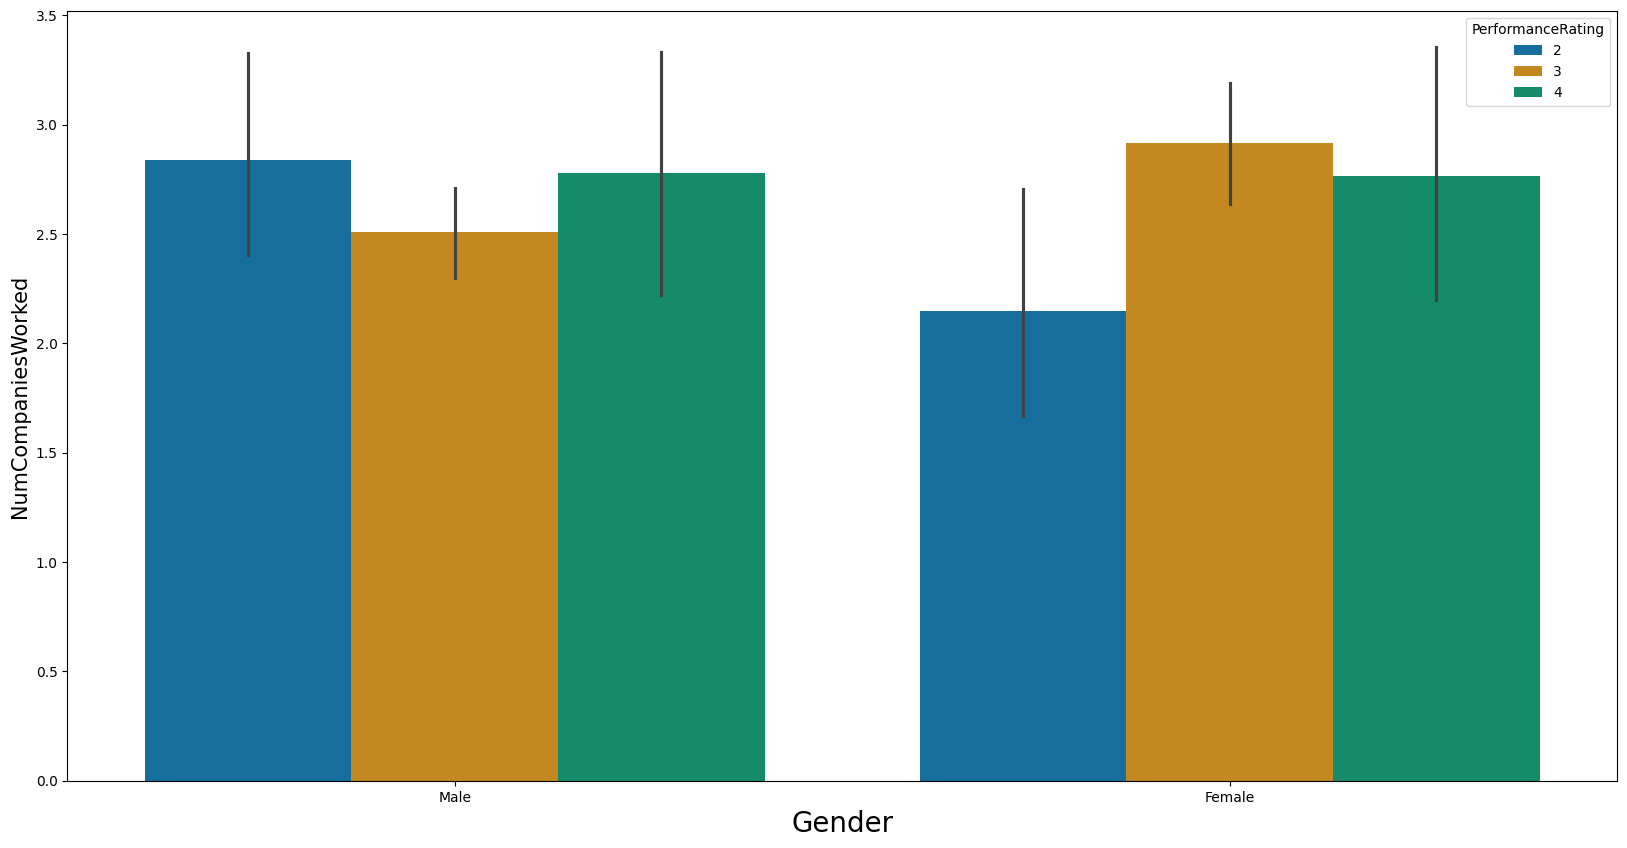

In [34]:
# check the relationship between Gender & Number Companies Worked with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=df.PerformanceRating,palette="colorblind",data=df)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

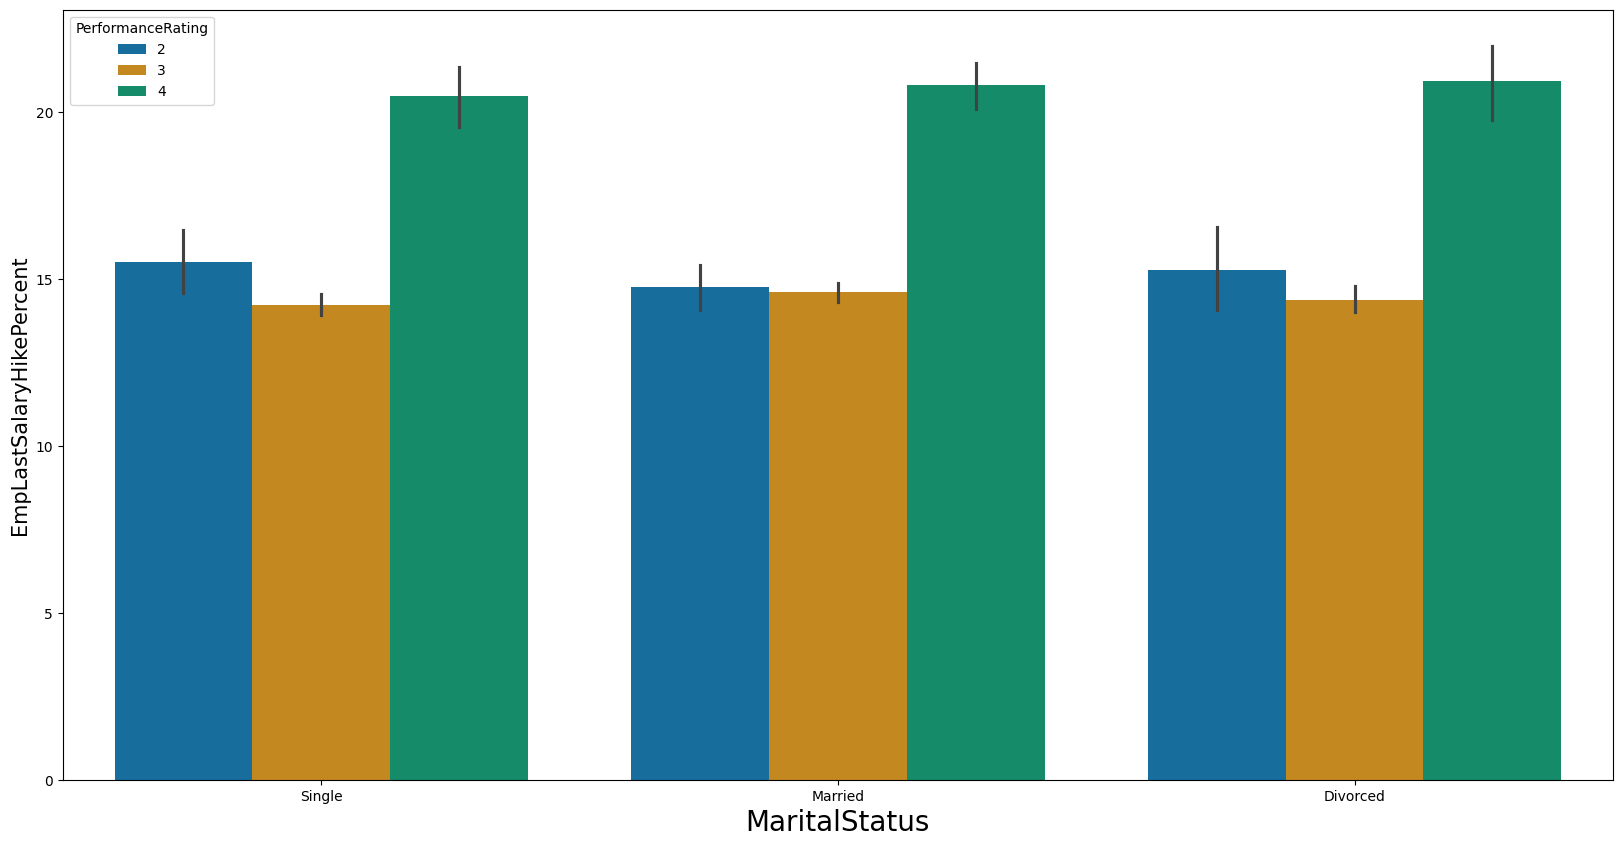

In [35]:
# Check the relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=df.PerformanceRating,palette="colorblind",data=df)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

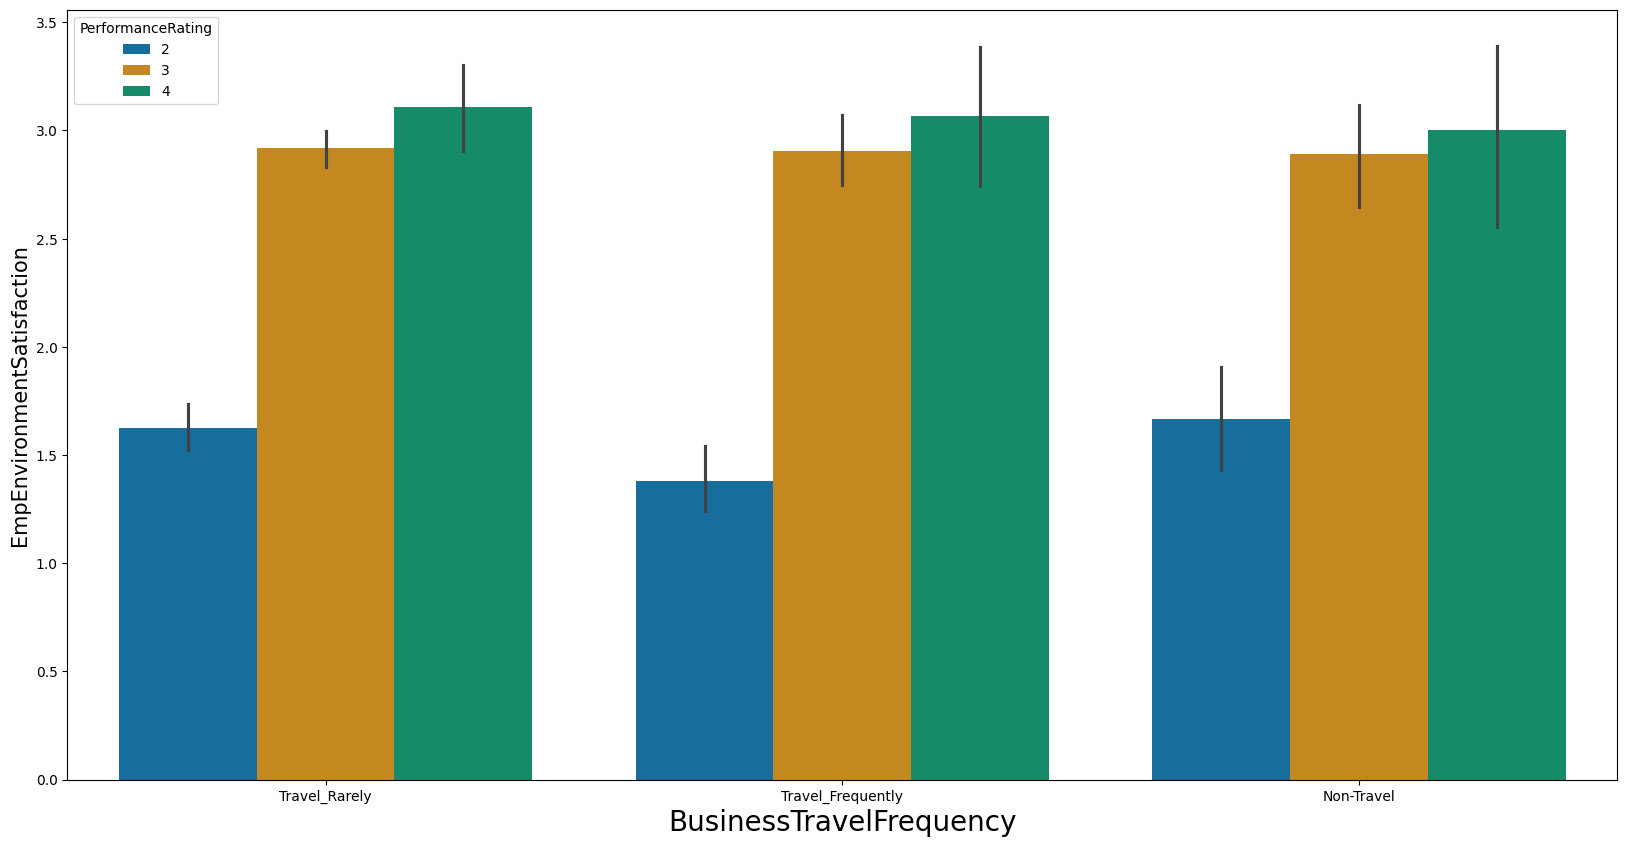

In [36]:
# Check the relationship between BusinessTravelFrequency & EmpEnvironmentSatisfaction with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='BusinessTravelFrequency',y='EmpEnvironmentSatisfaction',hue=df.PerformanceRating,palette="colorblind",data=df)
plt.xlabel('BusinessTravelFrequency',fontsize=20)
plt.ylabel('EmpEnvironmentSatisfaction',fontsize=15)
plt.show()

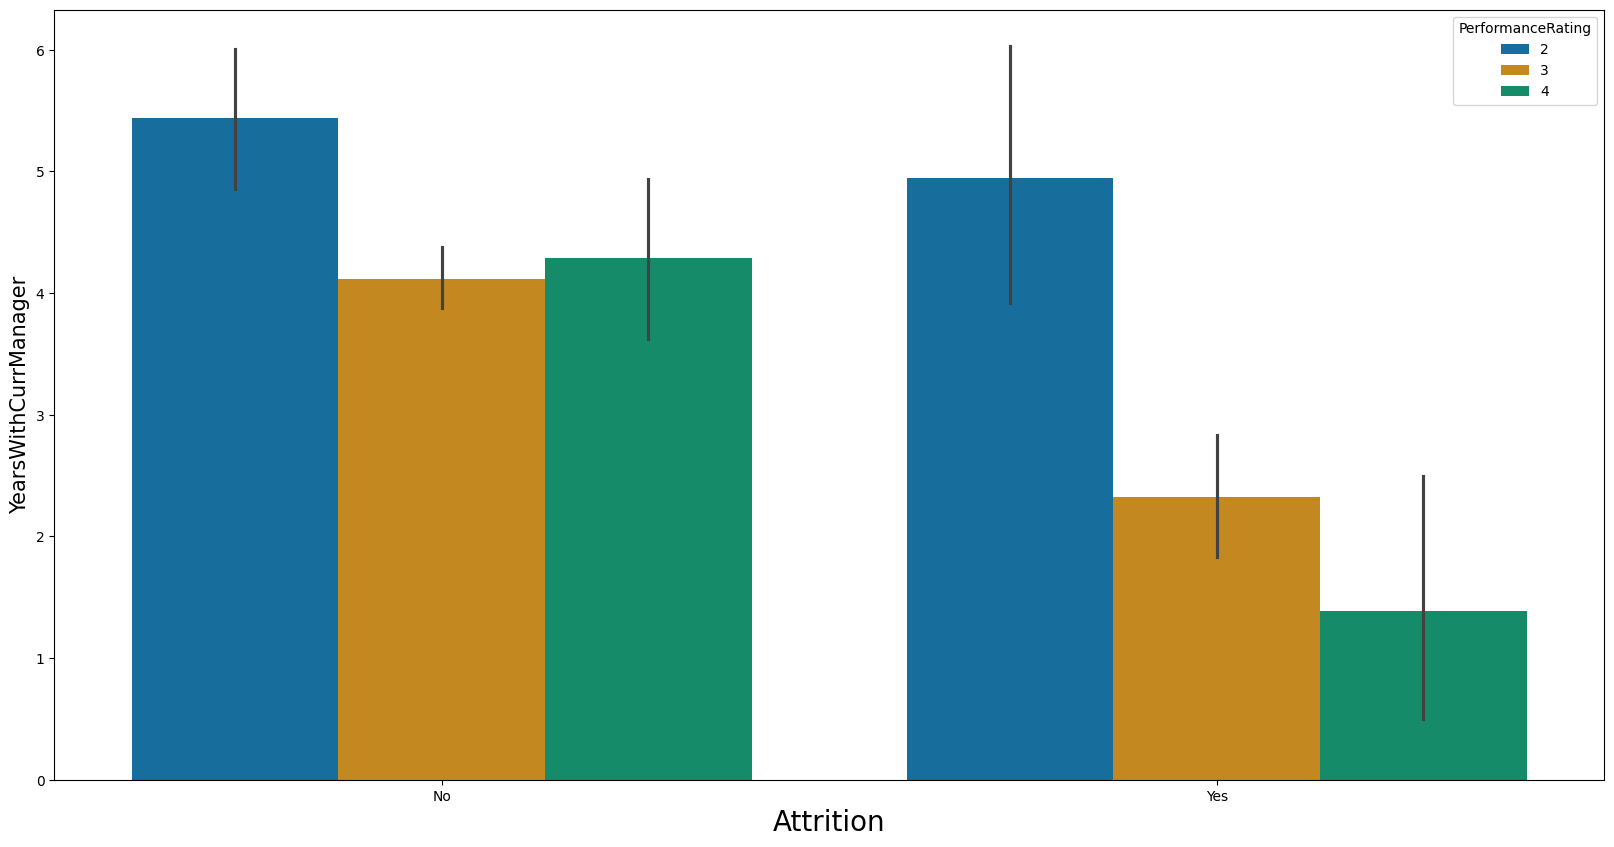

In [37]:
# Check the relationship between Attrition & YearsWithCurrManager with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue=df.PerformanceRating,palette="colorblind",data=df)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('YearsWithCurrManager',fontsize=15)
plt.show()

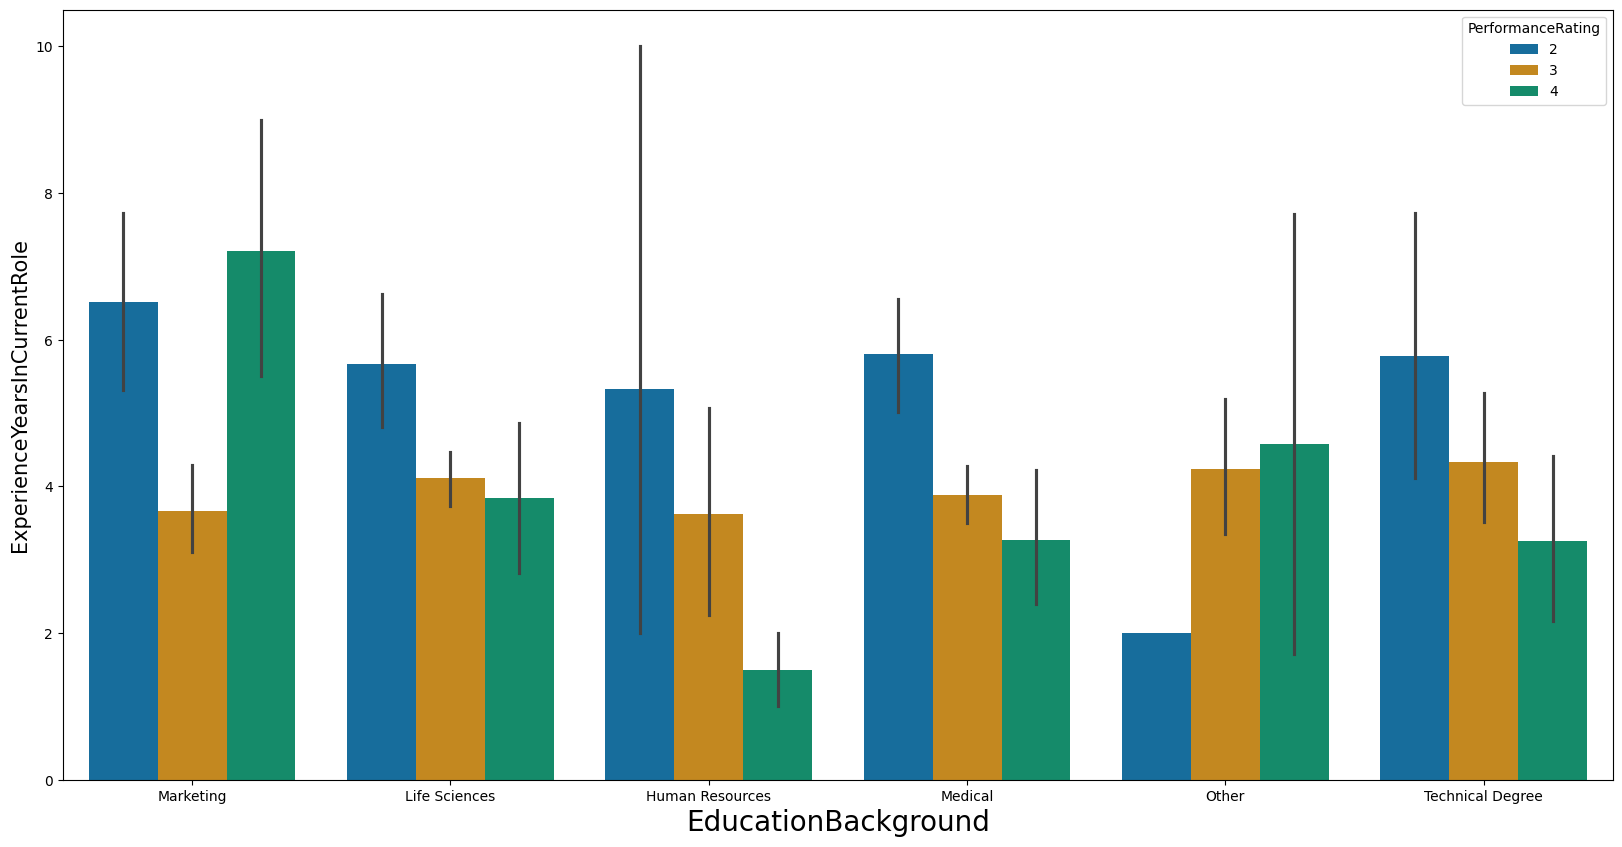

In [38]:
# Check the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=df.PerformanceRating,palette="colorblind",data=df)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()

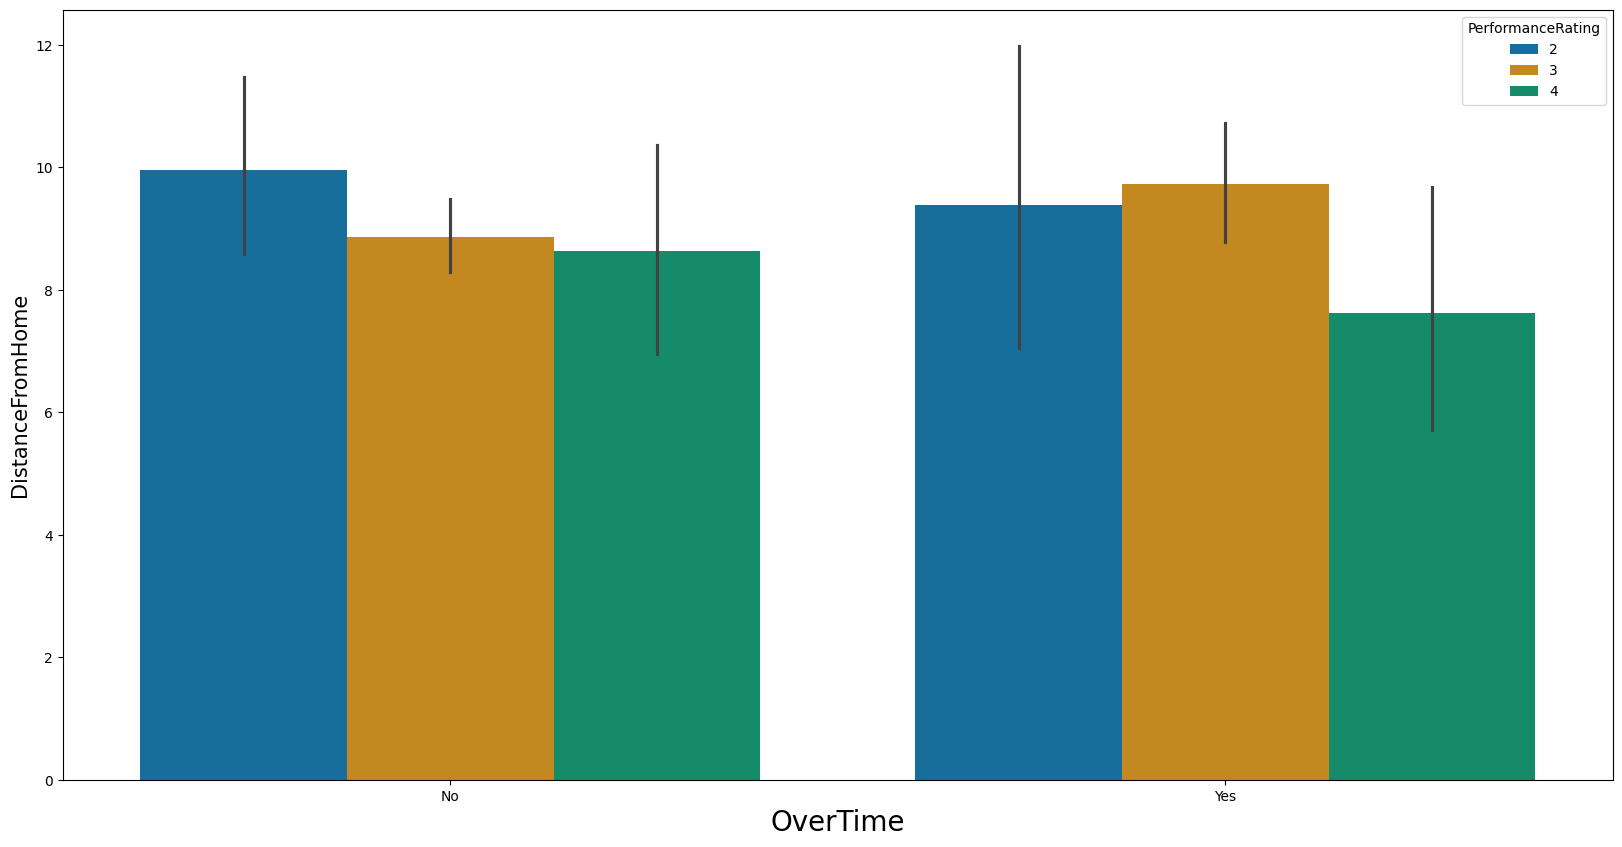

In [39]:
# Check the relationship between OverTime & DistanceFromHome with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='OverTime',y='DistanceFromHome',hue=df.PerformanceRating,palette="colorblind",data=df)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('DistanceFromHome',fontsize=15)
plt.show()

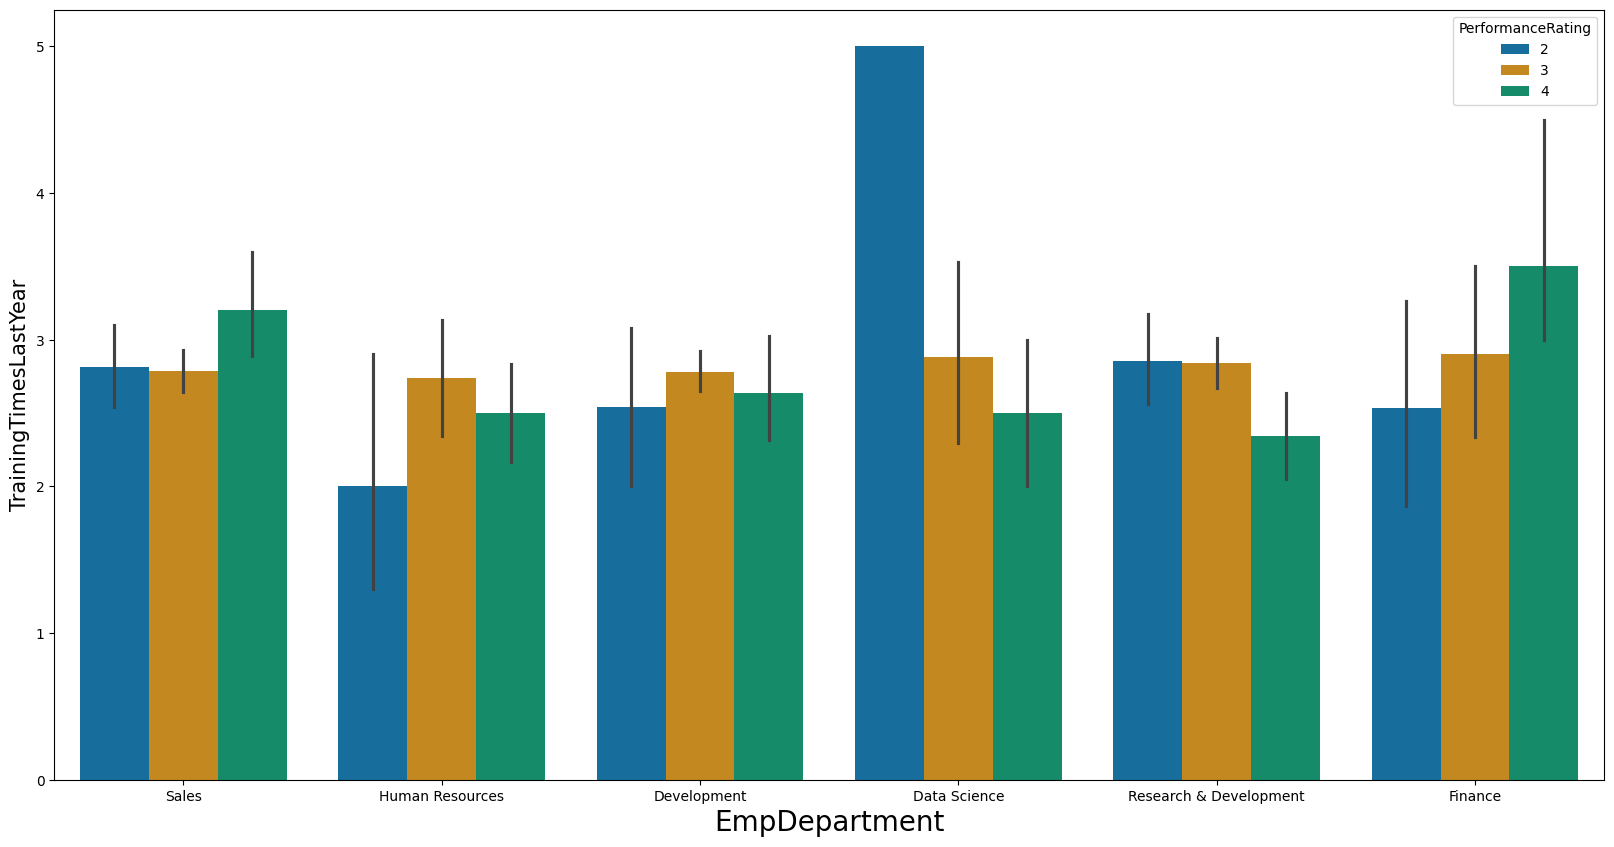

In [40]:
# Check the relationship between EmpDepartment & TrainingTimesLastYear with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=df.PerformanceRating,palette="colorblind",data=df)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

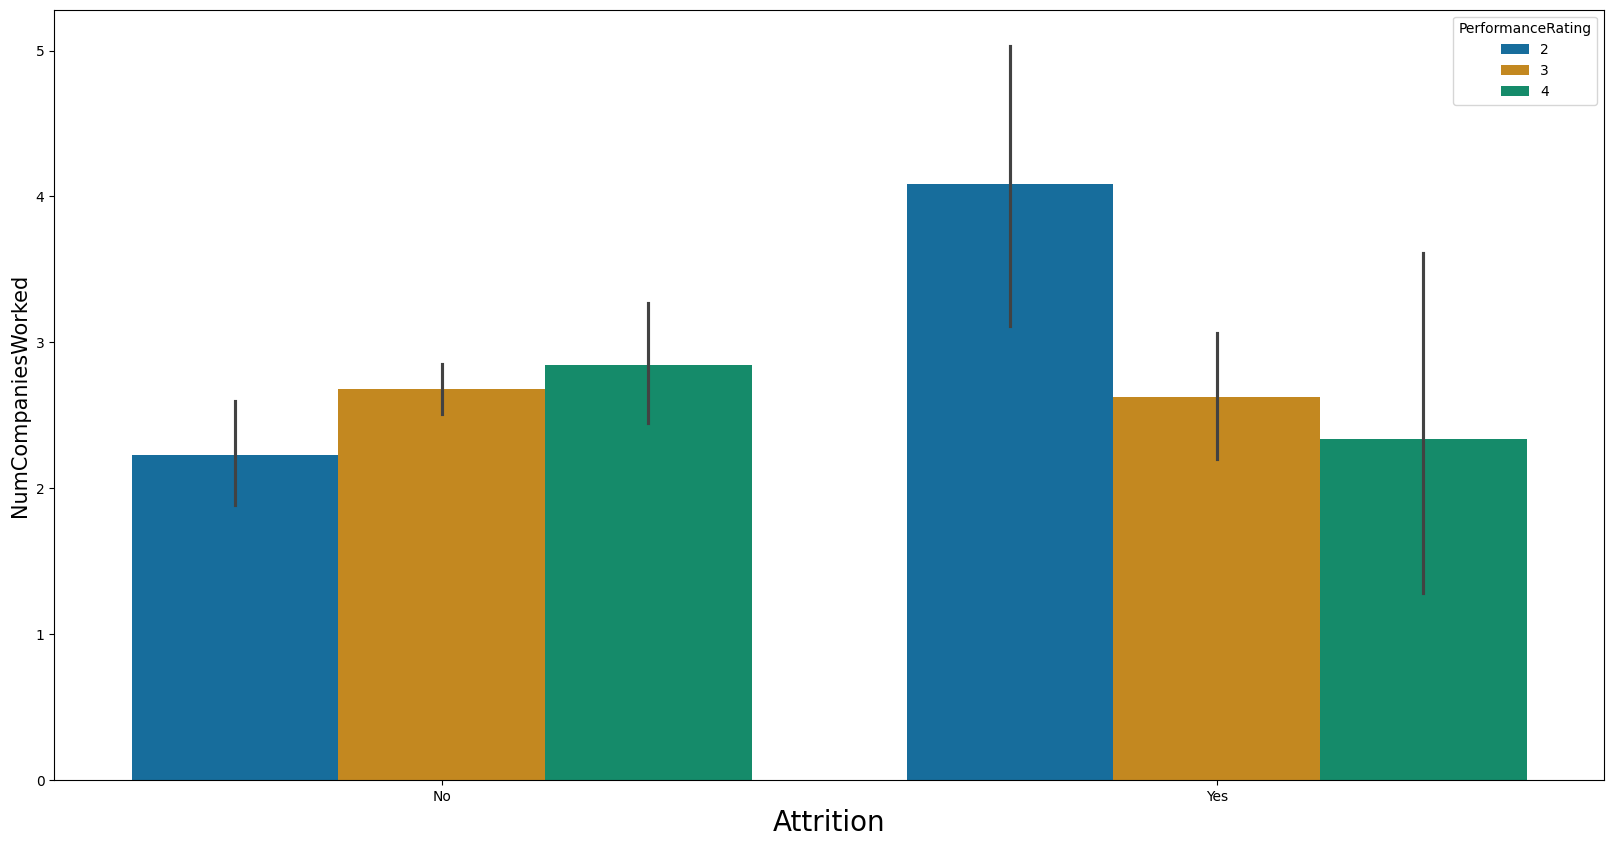

In [41]:
# Check the relationship between Attrition & NumCompaniesWorked with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='NumCompaniesWorked',hue=df.PerformanceRating,palette="colorblind",data=df)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()



---


# **7-7. Correlation Matrix**


In [43]:
# load standardized data from CSV files
cor_df = pd.read_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/scaled_data.csv')

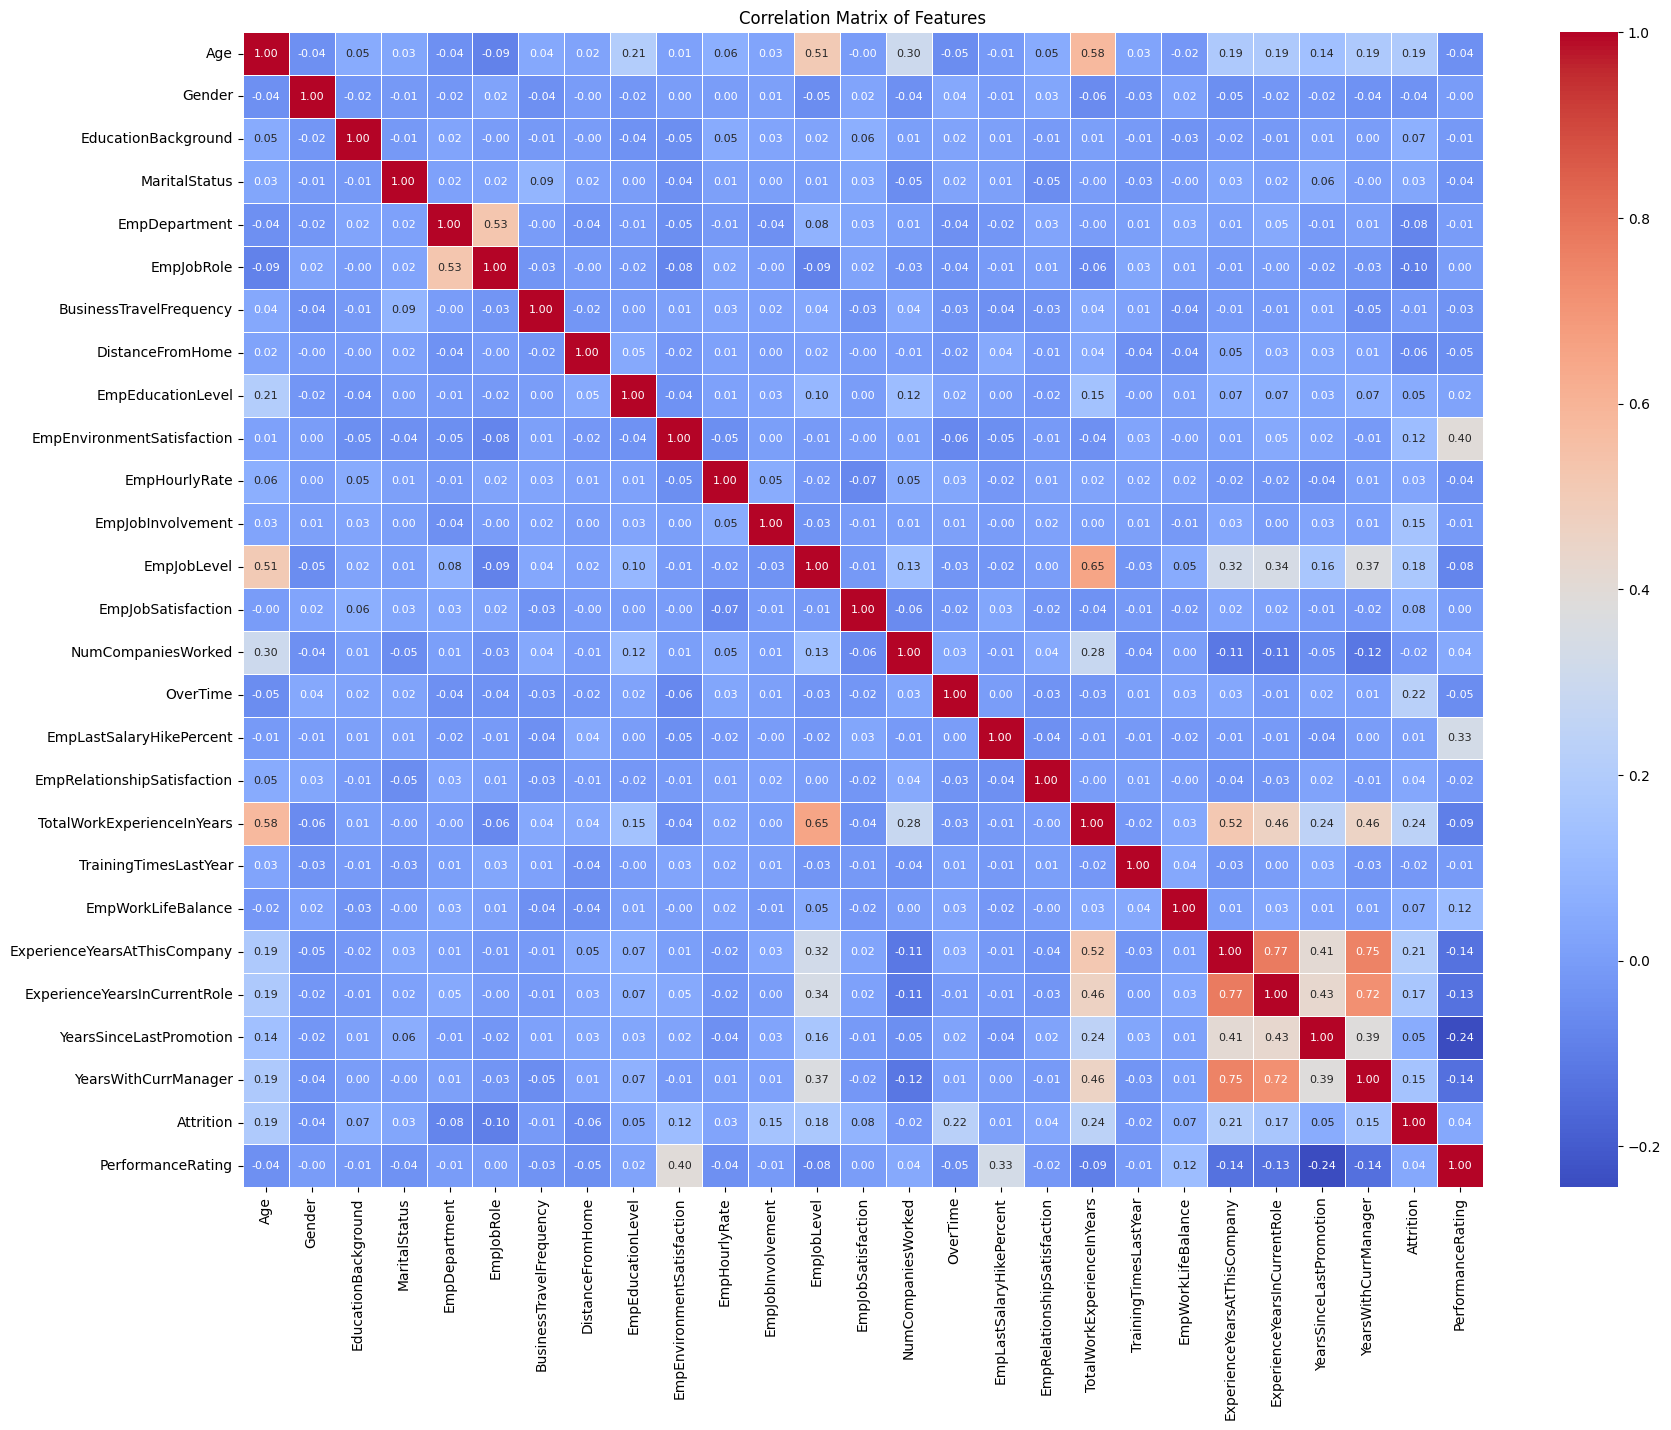

In [44]:
# heat map to show correlation for df

plt.figure(figsize=(20, 15))
correlation_matrix = cor_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"fontsize":8}) # Adjust fontsize as needed
plt.title('Correlation Matrix of Features')
plt.show()

In [45]:
# create a correlation matrix for df and order the data in descending order

correlation_matrix = cor_df.corr()

# Order the correlations in descending order
ordered_correlations = correlation_matrix['PerformanceRating'].abs().sort_values(ascending=False)

# Print or use the ordered correlations
print(ordered_correlations)

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion         0.243883
YearsWithCurrManager            0.139947
ExperienceYearsAtThisCompany    0.135162
ExperienceYearsInCurrentRole    0.132773
EmpWorkLifeBalance              0.124429
TotalWorkExperienceInYears      0.094800
EmpJobLevel                     0.076632
OverTime                        0.050206
DistanceFromHome                0.046142
NumCompaniesWorked              0.044320
EmpHourlyRate                   0.043116
Age                             0.040164
Attrition                       0.039796
MaritalStatus                   0.039682
BusinessTravelFrequency         0.031025
EmpEducationLevel               0.020529
EmpRelationshipSatisfaction     0.019502
EducationBackground             0.010804
EmpJobInvolvement               0.010539
TrainingTimesLastYear           0.006214
EmpDepartment                   0.005205
EmpJobRole      

**Insights**

* We can observe that the following features have a significant impact on Employee Performance:
 - EmpEnvironmentSatisfaction,
 - EmpLastSalaryHikePercent,
 - YearsSinceLastPromotion,
 - YearsWithCurrManager,
 - ExperienceYearsAtThisCompany,
 - ExperienceYearsInCurrentRole,
 - EmpWorkLifeBalance.

* The least impactful features are:
 - TrainingTimesLastYear,
 - EmpDepartment,
 - EmpJobRole,
 - Gender,
 - EmpJobSatisfaction.

* **The top 3 factors affecting employee performance are:**
 - _EmpEnvironmentSatisfaction_,
 - _EmpLastSalaryHikePercent_,
 - _YearsSinceLastPromotion_,



---


# **8-8. Performance Analysis by Top 3 Factors**


In [22]:
# function to use to analyze PerformanceRating for the top 3 factors in each department

def performance_rating(data, department):
    # Filter data by department
    department_data = data[data['EmpDepartment'] == department]

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'Performance Rating Analysis for {department}', fontsize=16)

    # Plot 1: EmpEnvironmentSatisfaction vs. PerformanceRating
    sns.countplot(x='EmpEnvironmentSatisfaction', hue='PerformanceRating', data=department_data, palette="colorblind", ax=axes[0])
    axes[0].set_title('EmpEnvironmentSatisfaction')
    axes[0].legend(loc='best')

    # Plot 2: EmpLastSalaryHikePercent vs. PerformanceRating
    sns.countplot(x='EmpLastSalaryHikePercent', hue='PerformanceRating', data=department_data, palette="colorblind", ax=axes[1])
    axes[1].set_title('EmpLastSalaryHikePercent')
    axes[1].legend(loc='best')

    # Plot 3: YearsSinceLastPromotion vs. PerformanceRating
    sns.countplot(x='YearsSinceLastPromotion', hue='PerformanceRating', data=department_data, palette="colorblind", ax=axes[2])
    axes[2].set_title('YearsSinceLastPromotion')
    axes[2].legend(loc='best')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
    plt.show()

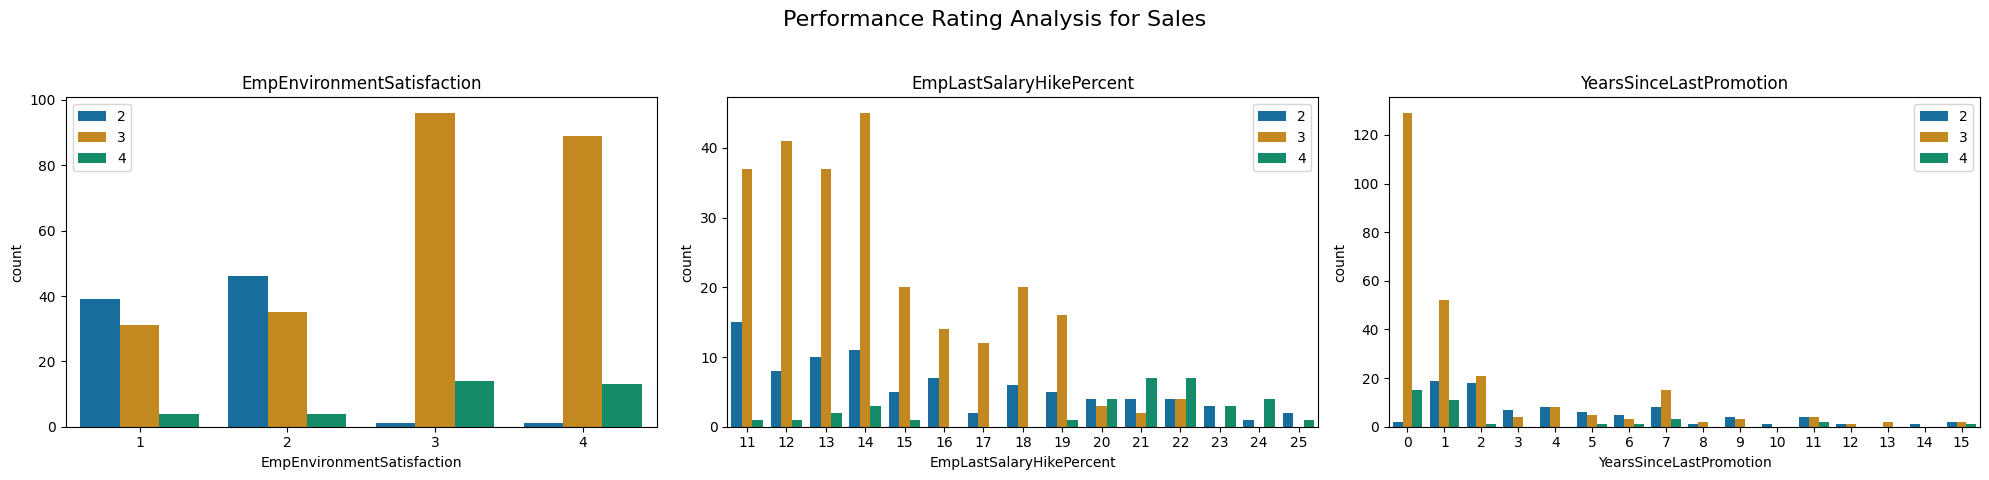

In [23]:
# Sales Departmental Analysis:
performance_rating(df, 'Sales')

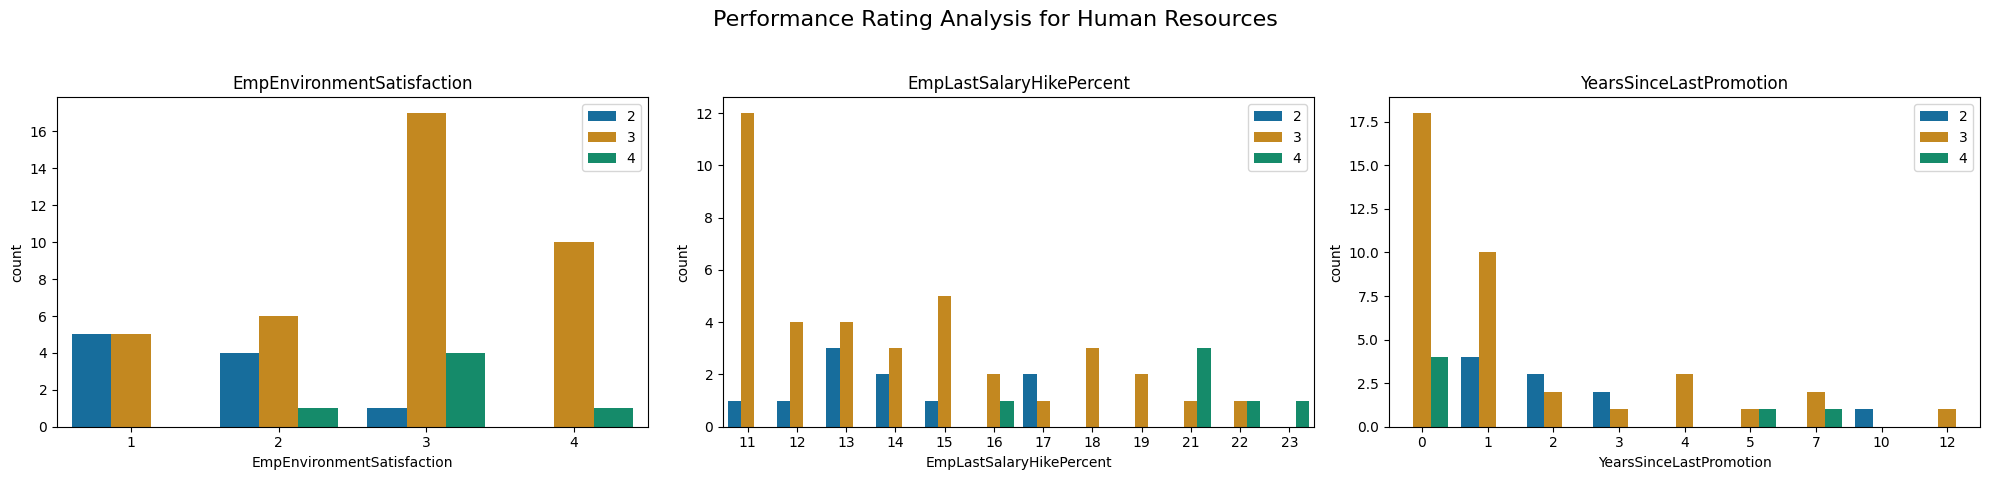

In [24]:
# Human Resources Departmental Analysis:
performance_rating(df, 'Human Resources')

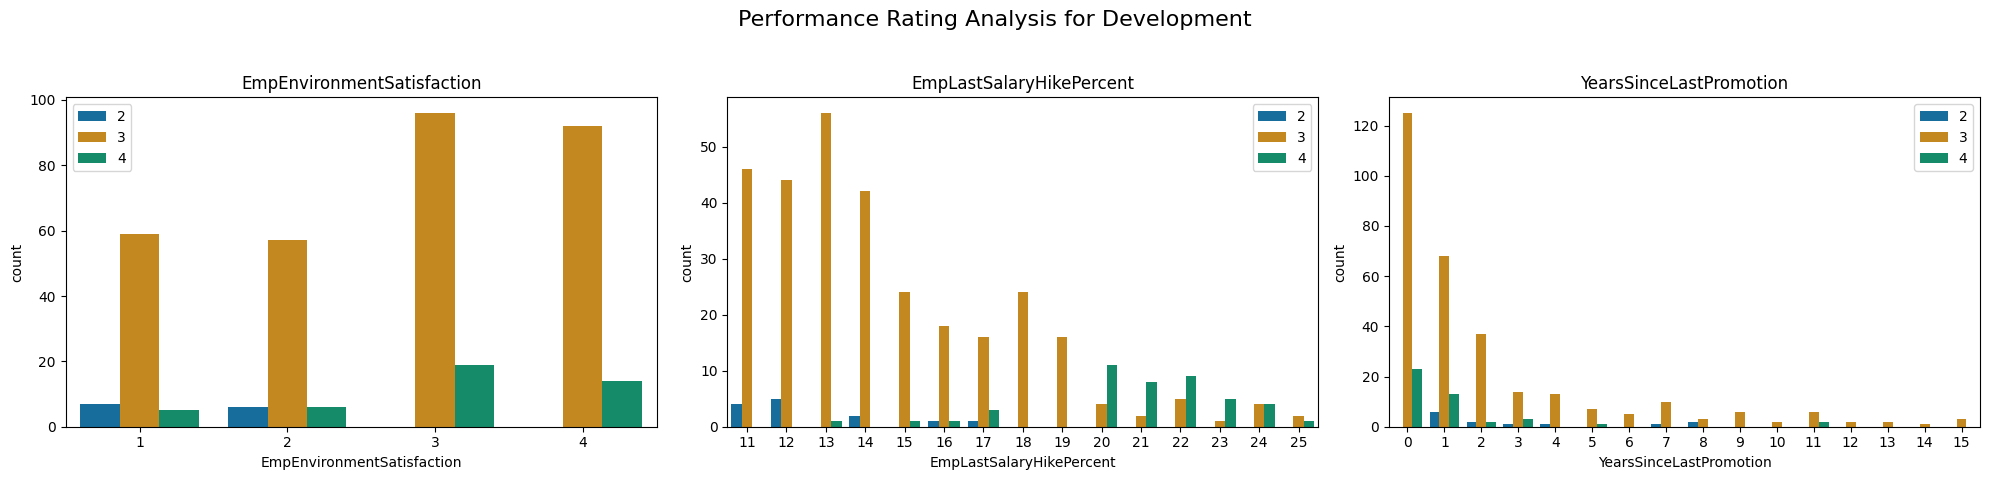

In [25]:
# Development Departmental Analysis:
performance_rating(df, 'Development')

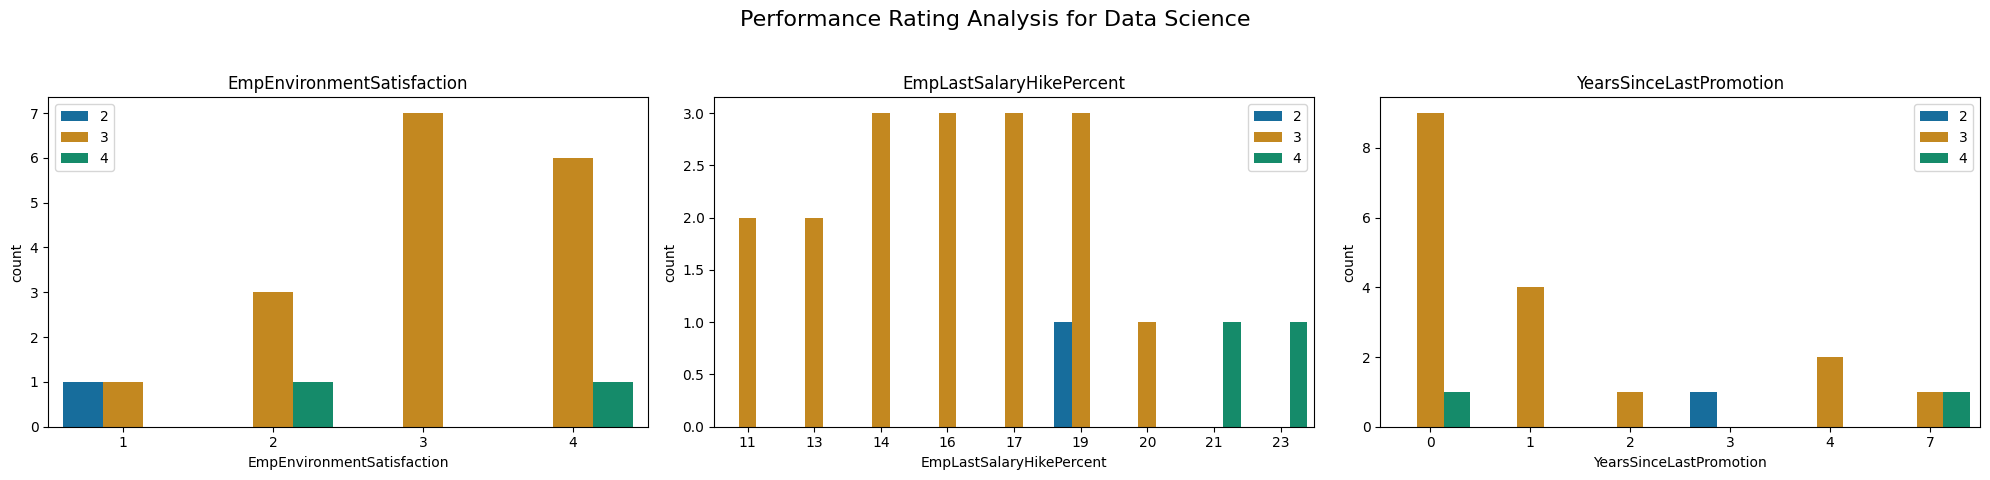

In [26]:
# Data Science Departmental Analysis:
performance_rating(df, 'Data Science')

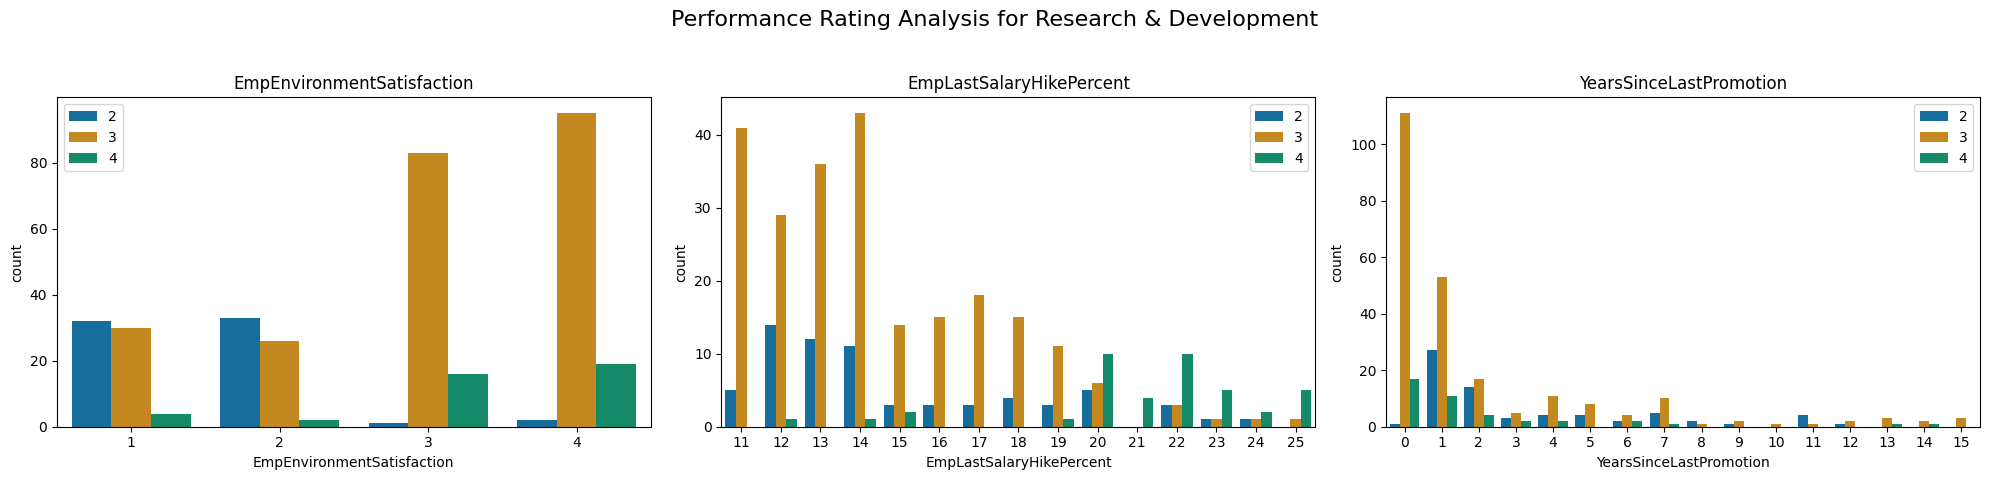

In [27]:
# Research & Development Departmental Analysis:
performance_rating(df, 'Research & Development')

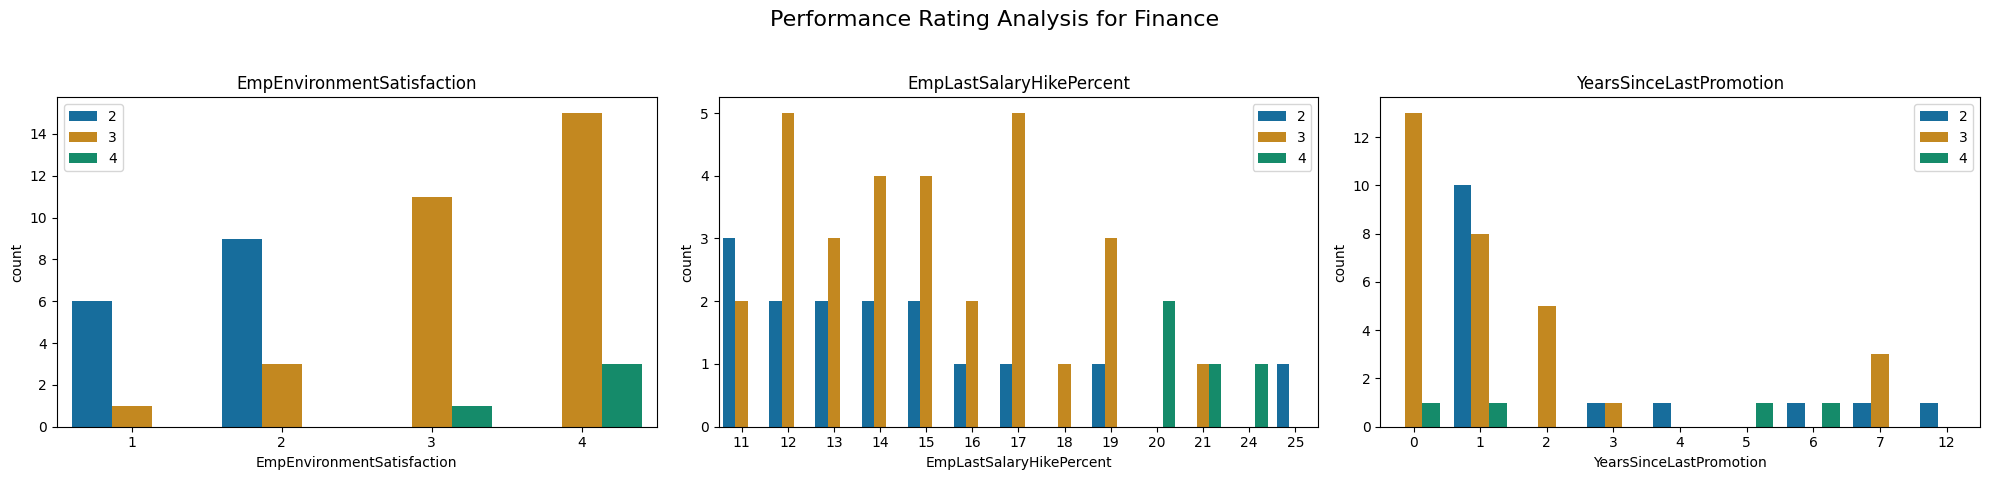

In [28]:
# Finance Departmental Analysis:
performance_rating(df, 'Finance')



---

#**Analysis and Insights**


---



**Understanding the Dataset**


* The employee performance dataset consists of 1200 records, each record containing 28 (columns) features.

* There dataset consists of the following features:
 - 16 categorical features,
 - 11 numeric features, and
 - 1 alpha-numeric feature [EmpNumber] - not usefull for analysis hence dropped.

 _**NB:** Performance Rating is the target feature_




---


**General Observation and Insights**

* Approximately **46%** of employees are married, **22%** have devorced, whilst **22%** are single.

* Three departments **(Sales, Development, Research and Development)** out of the total of six constitute **89%** of the total employees.

* About **71%** of total employees rarely travel.

* Only **29%** of total employees work overtime.

* There is a low employee attrition of about **15%**.

* The number of the educational backgrounds present in the employees is **six** unique backgrounds.

* **Nineteen** unique employee job roles are present in this company.

* The most of the employees are having the education level of **3**

* The Job satisfaction level in this company is high level for the majority of employees.

* Only **11%** of employees in the company were achieved **level 4** - performance rating

* The employee age ranges from **18** to **60**, with most of the employees lying between age **25** to **40**,

* The distance from home to office ranges from **0** unit to **30** units, with the most of the employees coming from the range of **0** to **5** units,

* Employees have generally worked in multiple companies up to **8**, with most of the employees having worked for up to **2** companies before joining the company (INX Future Inc.),

* The hourly rate range is **65** to **95** for majority employees who work in this company,

* Work experiance range between 0 to 40, with most of the employee experiance ranging between **5** to **10**,

* In general, most of the employees have spent **5** working for INX Future Inc.,

* Most of the employees get **11%** to **15%** of salary hike in this company,

* **72.8%** of overall employees fall under performance rating of **3**, whilst only **11%** have scored performance rating of 4 and **16.2%** rating **2**,

* Average performance rating across all departments is approximately **3**,

* Employee education level ranges between **1** to **5** [below college - doctor], with majority employees having an education level of **3** and **4**. Education levels **1, 2 and 5** constitute total employees of **150, 250, and 50** respectively,

* Employee Environment Statisfaction level ranges from **1 to 4**, with **3 and 4** constituting the highest proportion of employees. **1 and 2** constitute thw least number of employees (approximately **230 and 250** respectively),

* Majority of employees (**700**) have a work life balance score of **3 (Better)**.  The remaining fewer proportions are distributed across levels 1 (Bad), 2 (Good) and 4 (Best).



---


**Impact of Other Features on Performance Rating (Target Feature)**

* Gender vs Performance Rating:
 - Majority male and female employees have a performance rating of **3**,
 - Least number of employees rate **4** for both males and females.

* EducationBackground vs Performance Rating:
 - Majority of life sciences and medical education background employees have performance rating 3,
 - Life sciences and medical education employees constitute higher numbers with performance rating of 4.

* MaritalStatus vs Performance Rating:
 - All employees across the three categories of marital status rate 3,
 - A bigger number from the Married category also have a performance rating of 2.

* Business Travel Frequency vs Performance Rating:
 - Majority of employees who rarely travel have a rating of **3**,
 - Frequent and non - travellers have a similar distribution pattern of performance rating, though they're very few.

* Overtime vs Performance Rating:
 - Majority employees don't do overtime,
 - Highest number of employees rate **3** among both categories doing overtime and those who don't,
 - Least number of employees rate **4** among both categories.

* Attrition vs Performance Rating:
 - A similar distribution pattern shows for those likely to leave (Attrition - Yes) and not likely to leave (Attrition - No), where majority rate 3, followed by 2 and 4 being the least.

 * EmpEducationLevel vs Performance Rating:
 - There is equal distribution of employee education level across the performance bands [3,4 & 2].

* EmpEnvironmentSatisfaction vs Performance Rating:
 - Majority employees with performance rating of 3 are in the range of EmpEnvironmentSatisfaction 2 - 4 and a median of 3,
 - Employees with performance rating of 4 are in the range of EmpEnvironmentSatisfaction 3 - 4,
 - Employees with performance rating 2 are in the range of EmpEnvironmentSatisfaction 1 - 2.

* EmpJobInvolvement vs Performance Rating:
 - There is equal distribution of employee job involvement level across the performance bands [3,4 & 2],
 - Employees with job involvement of 2 & 3 mostly have performance rating 3.

* EmpJobLevel vs Performance Rating:
 - Performance rating 2 and 3 have the highest proportion of employees with job levels 1 - 3 and a median job level of 2,
 - Performance rating 4 has the least proportion of employees, with job levels 1 and 2, as well as some outliers in job levels 4 and 4.

* EmpJobSatisfaction vs Performance Rating:
 - There is equal distribution of employee job satisfaction across the performance bands [3,4 & 2],
 - Majority job satisfaction range between 2 - 4, with median of 3.

* EmpWorkLifeBalance vs Performance Rating:
 - There is equal distribution of work life balance across the performance bands [3 & 2], with EmpWorkLifeBalance of 2 and 3
 - A very small proportion falls under performance rating 4, with median EmpWorkLifeBalance of 3 and some outliers in EmpWorkLifeBalance of 2 and 4.

* YearsSinceLastPromotion vs Performance Rating:
 - Performance rating 2 shows a large proportion of employees in the range of 0 - 5 years since last promotion, up to an upper quartile of about 13 years,
 - Performance rating of 3 is dominated by employees recently promoted, with a median of about 1 year and upper quartile of 5 years,
 - Performance rating of 4 follows a similar pattern with rating 3, except that there are very few employees in the outlier range of 5 to 15 years since last promotion.
 - _**NB:** employees that have overstayed in the same grade tend to perform less._